In [27]:
import pandas as pd
import requests
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


In [52]:
hubs = ['ALBE', 'ALDE', 'AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

start = datetime(2023, 1, 1).strftime('%Y-%m-%d')
end = datetime(2023, 3, 31).strftime('%Y-%m-%d')

In [61]:
def retrieve_maxbex(fromDate, toDate):
    data = {
        'fromUtc': f'{fromDate}T00:00:00.000Z',
        'toUtc': f'{toDate}T23:00:00.000Z',
    }

    try:
        response = requests.post('https://publicationtool.jao.eu/core/api/data/maxExchanges', json=data)
        response.raise_for_status()
    except requests.exceptions.HTTPError as err:
        print(err)
        
    return pd.DataFrame(response.json()['data'])

In [62]:
df_maxbex = retrieve_maxbex(start, end)

In [63]:
df_maxbex = df_maxbex.set_index('dateTimeUtc')
df_maxbex.index = pd.to_datetime(df_maxbex.index)
df_maxbex = df_maxbex.tz_localize(None)

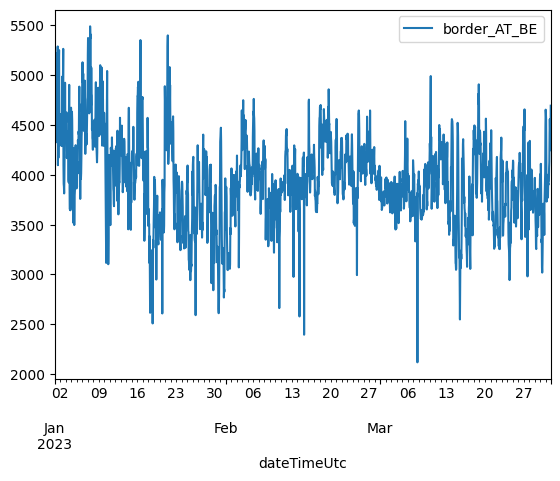

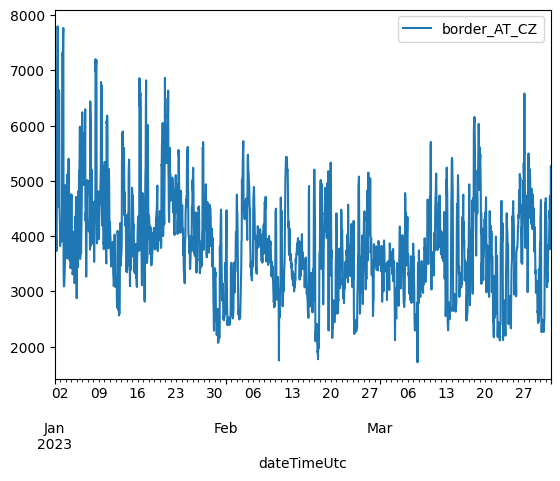

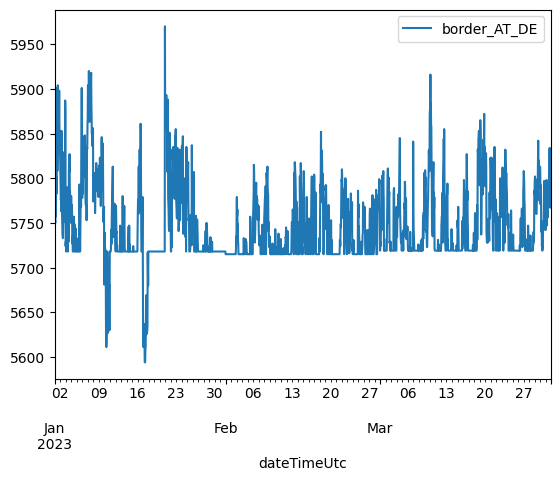

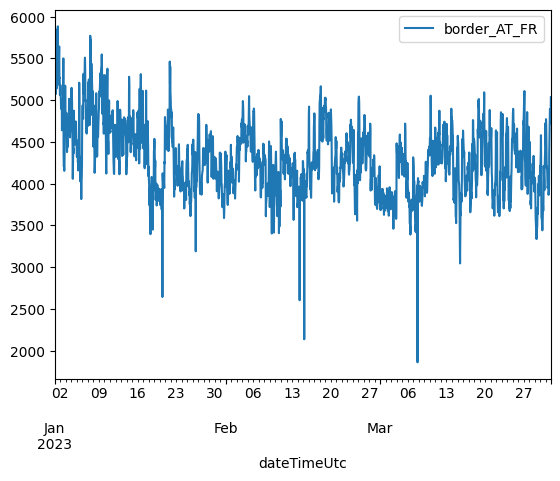

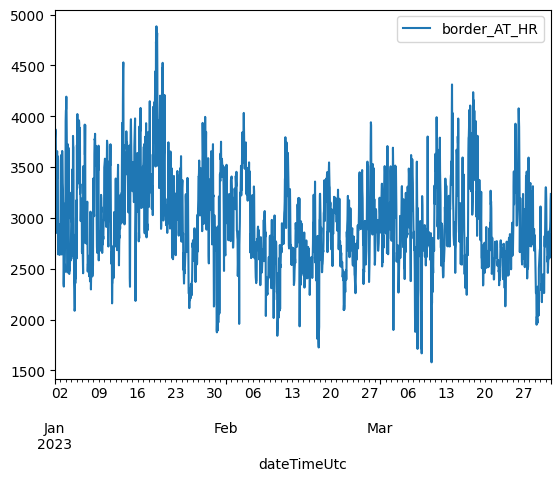

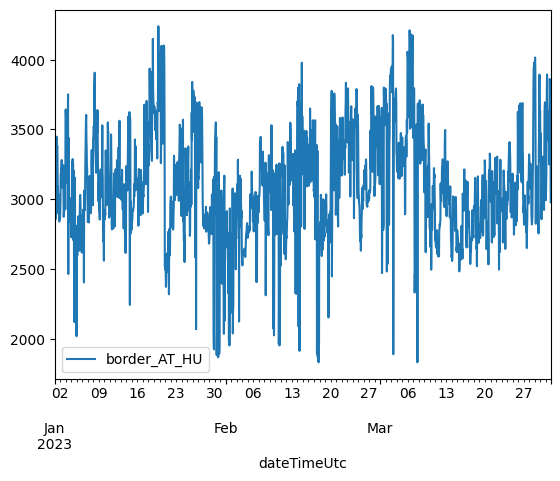

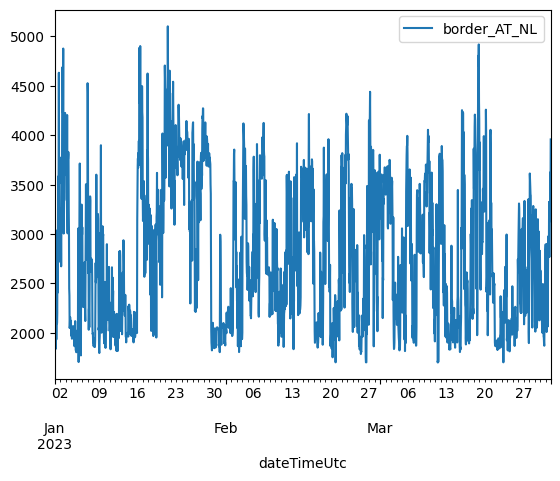

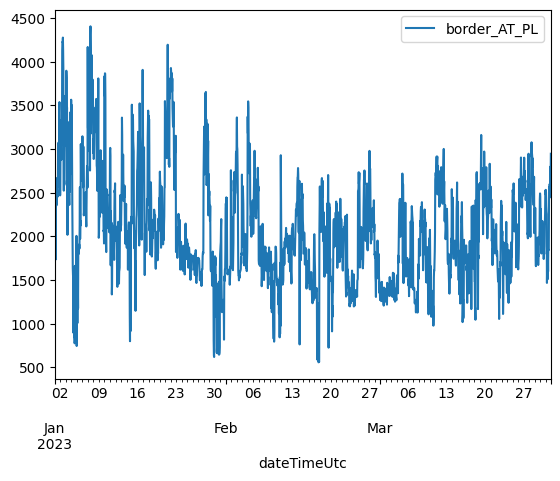

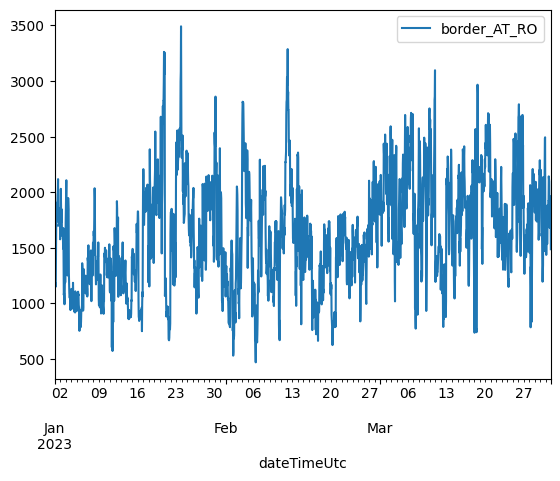

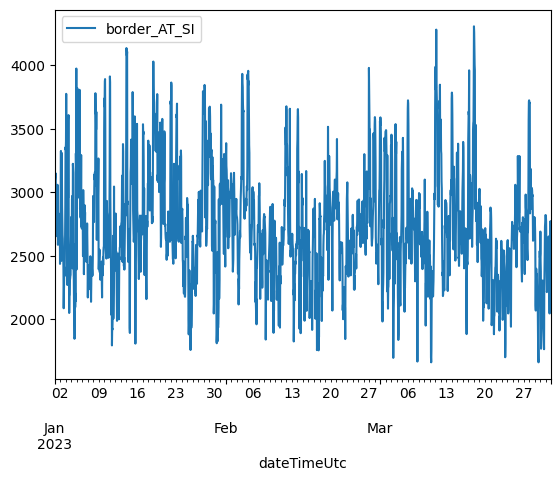

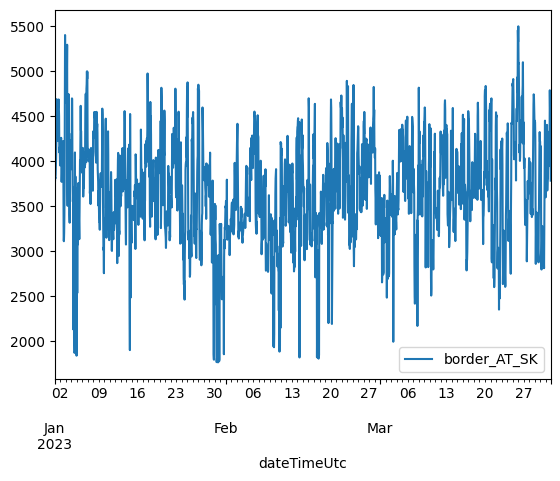

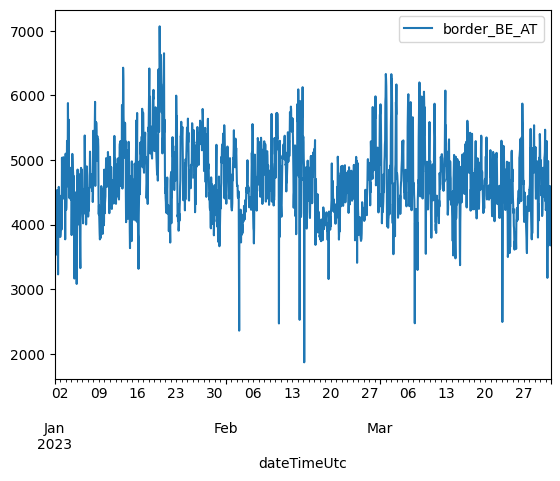

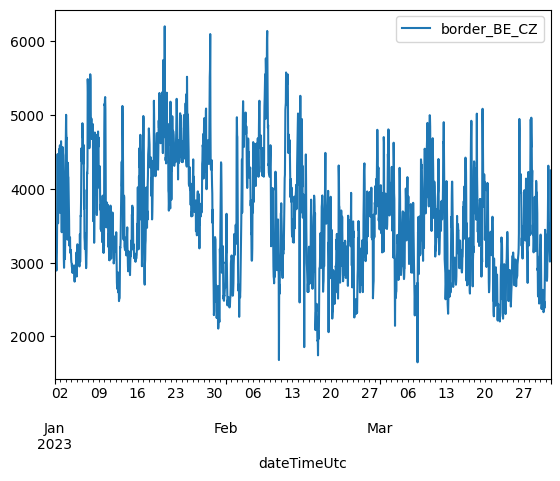

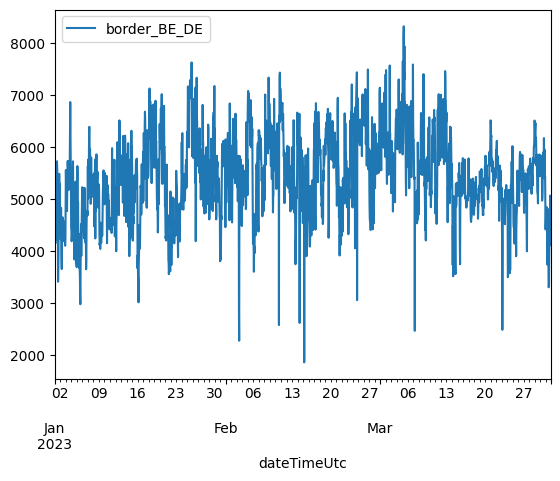

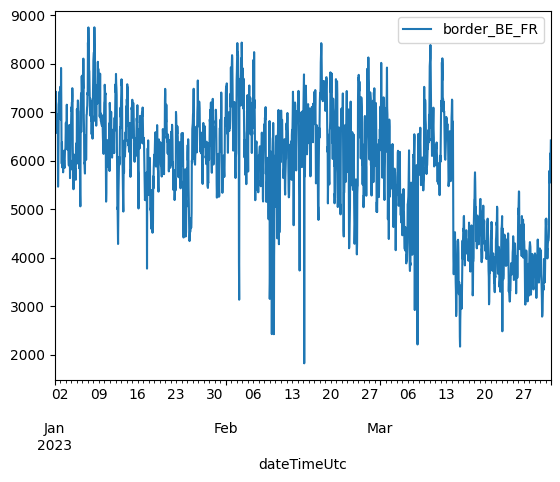

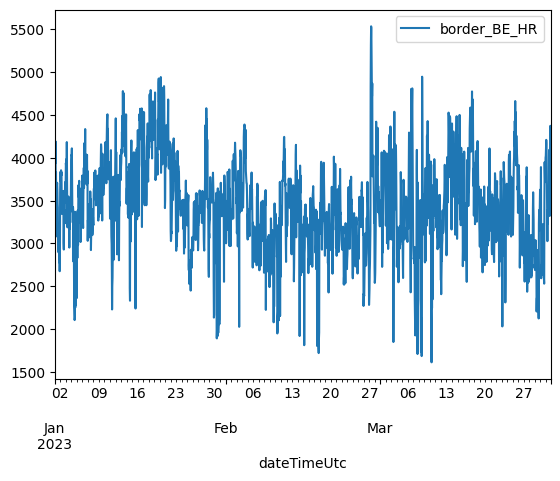

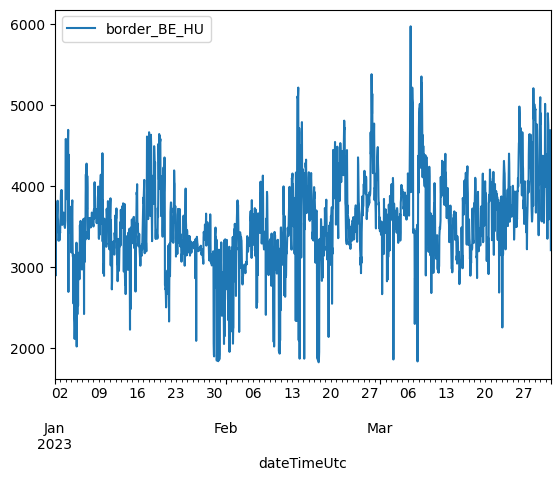

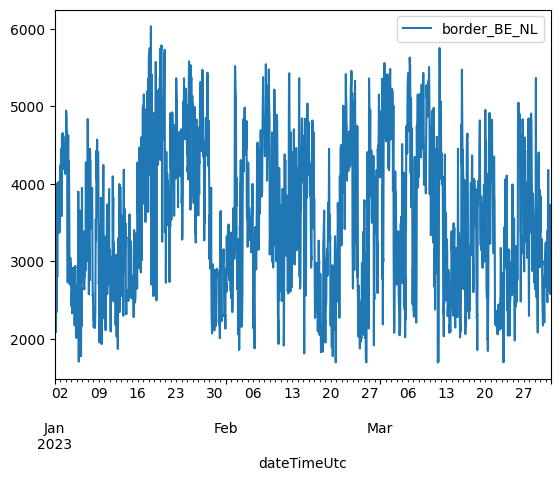

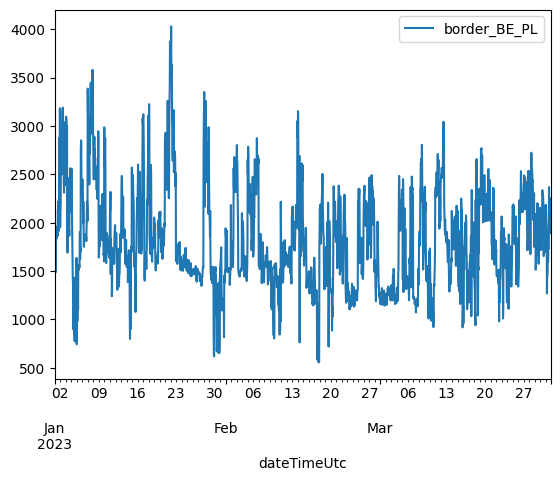

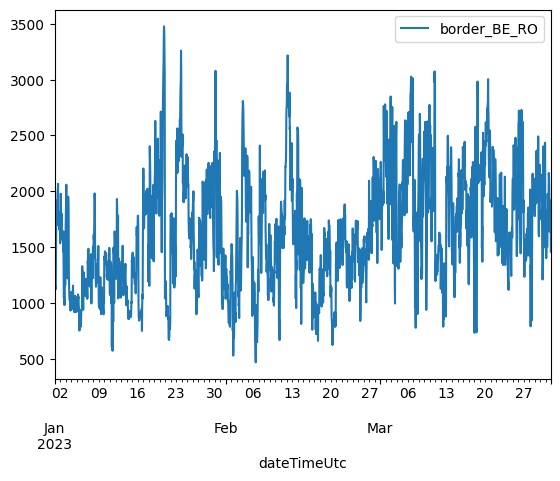

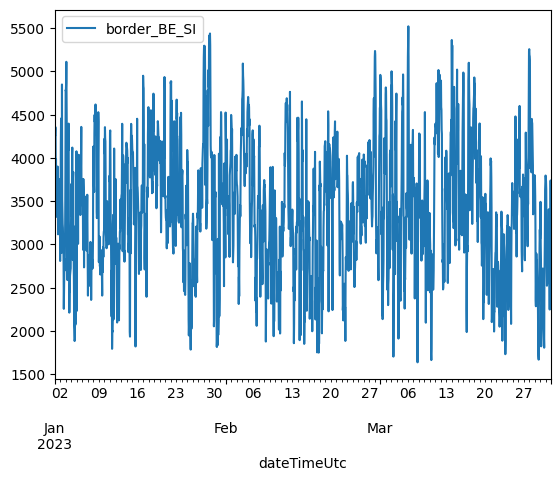

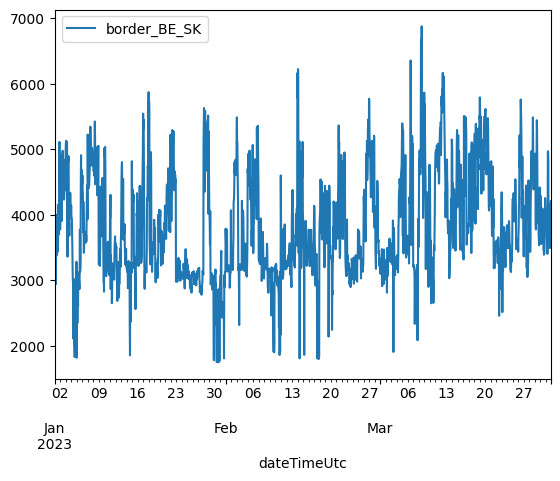

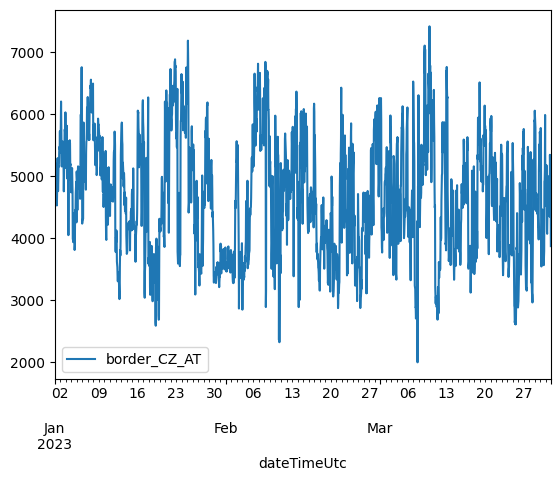

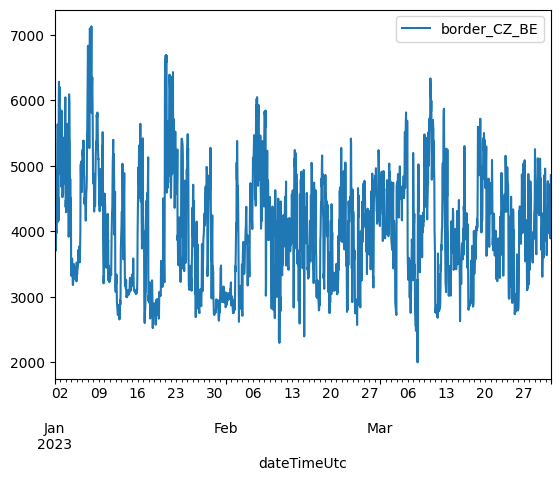

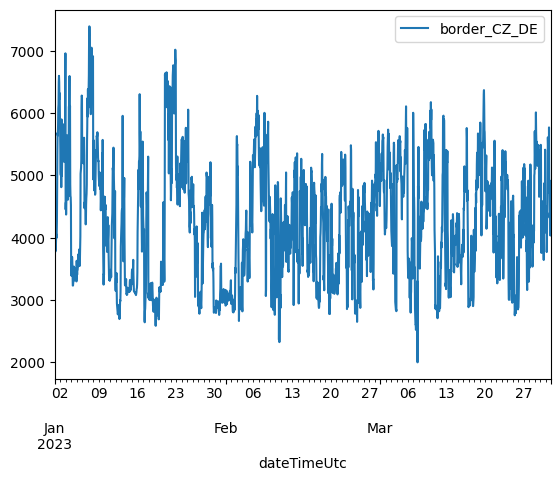

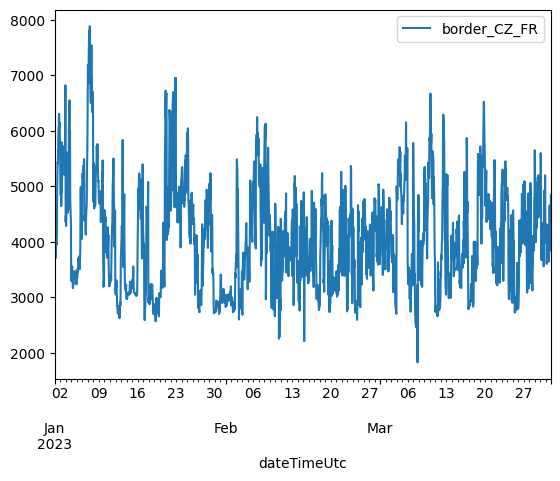

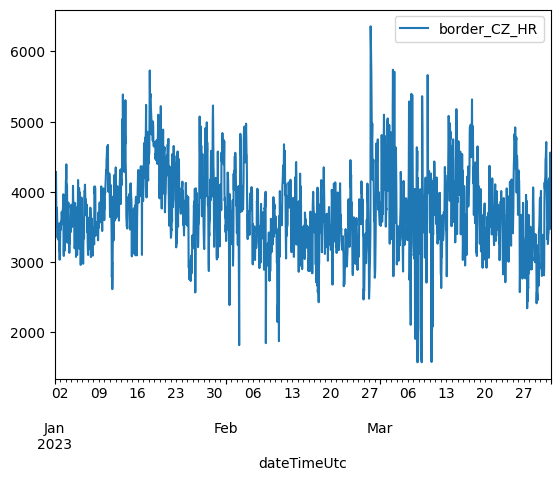

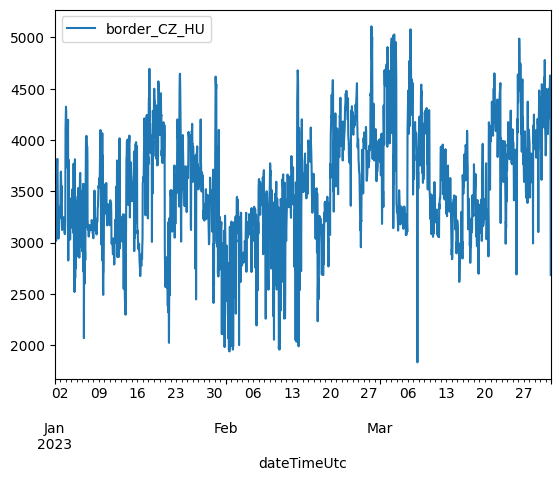

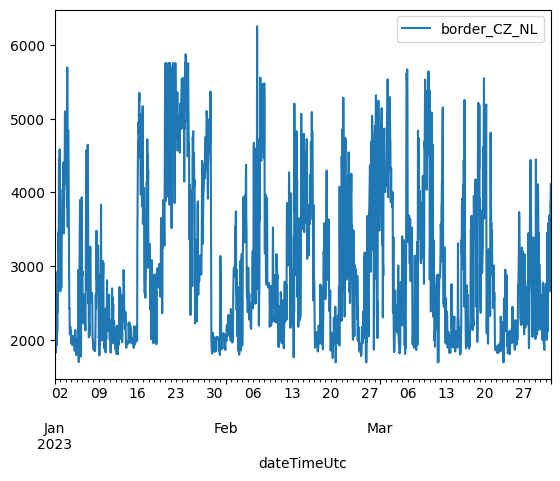

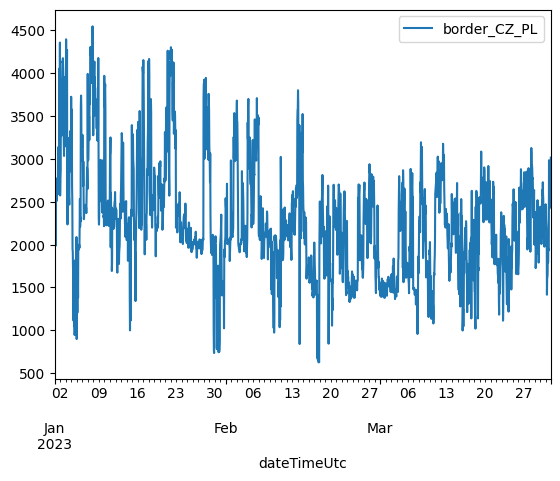

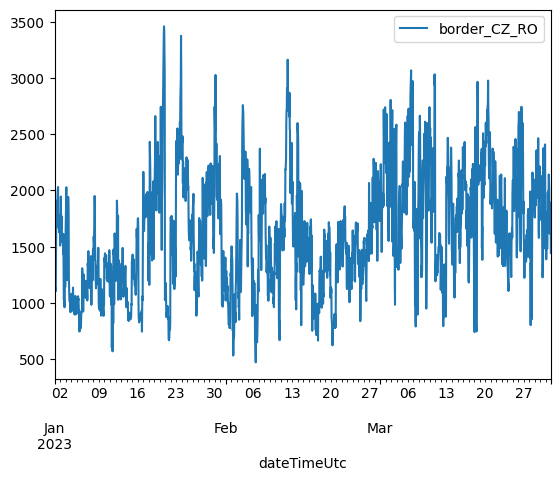

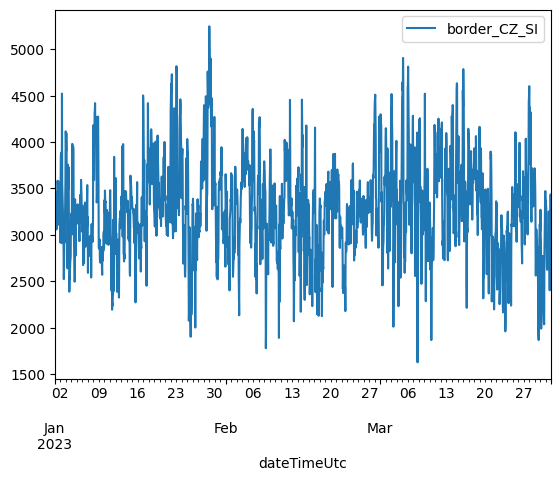

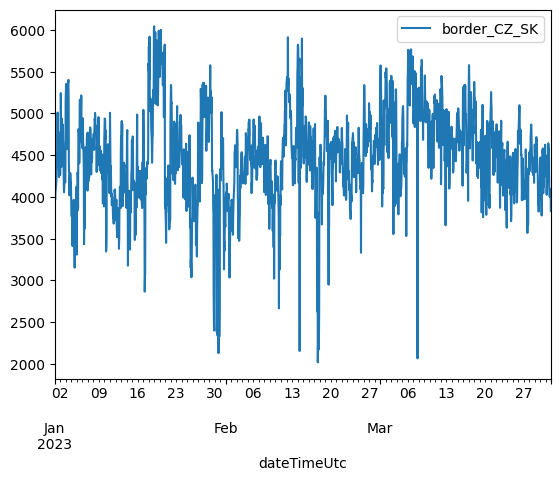

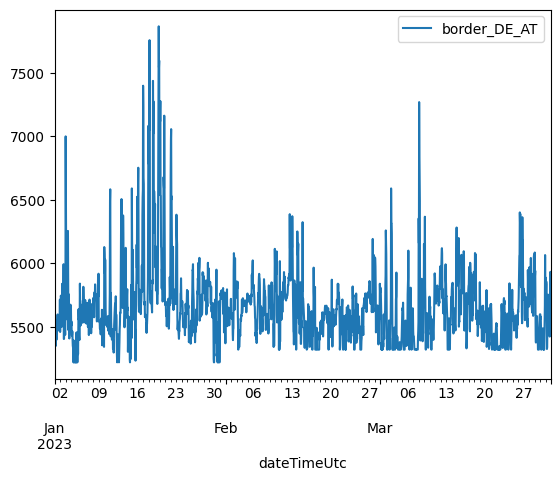

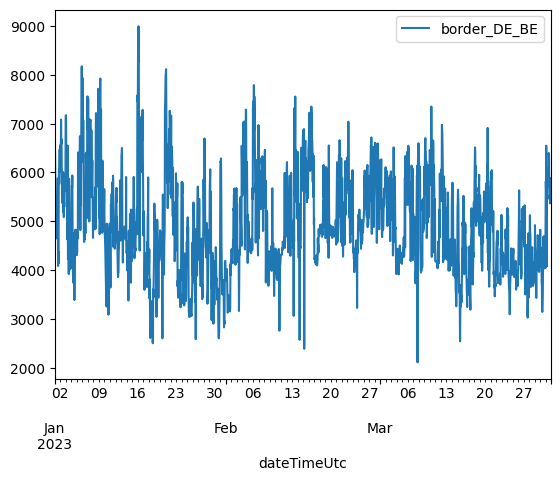

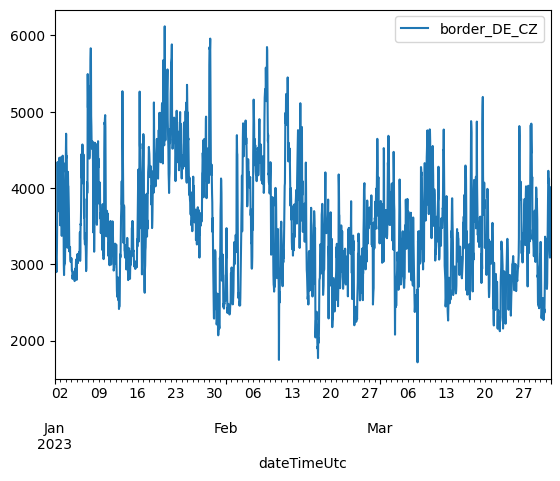

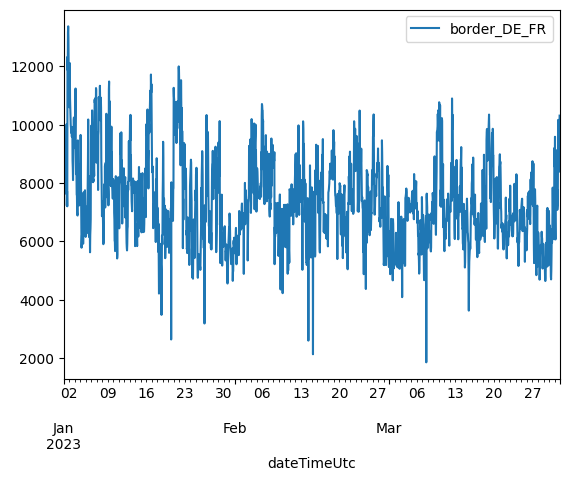

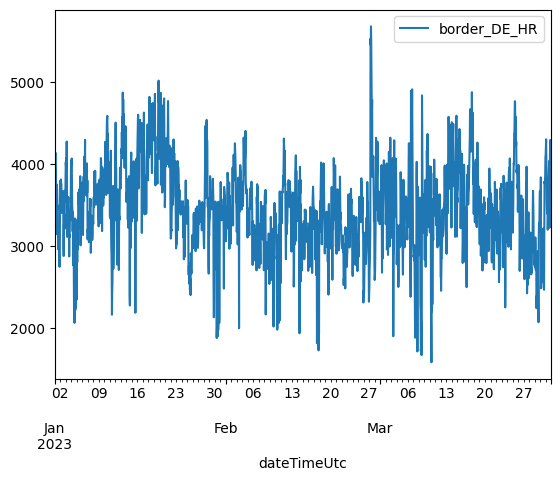

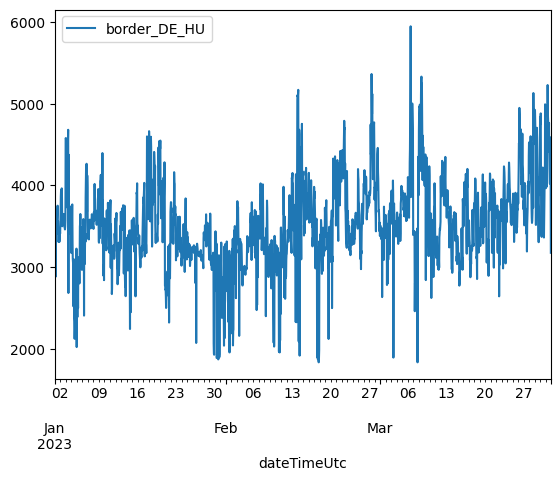

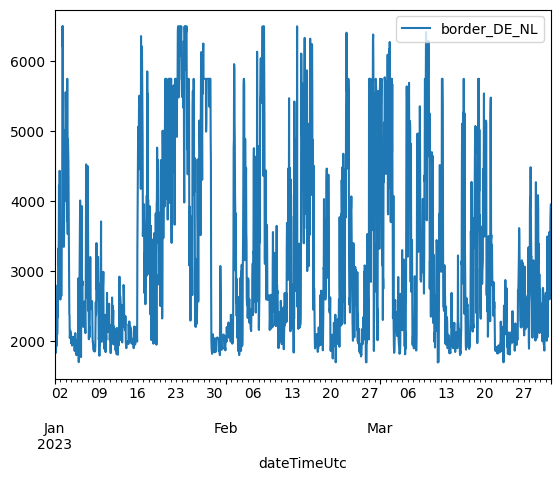

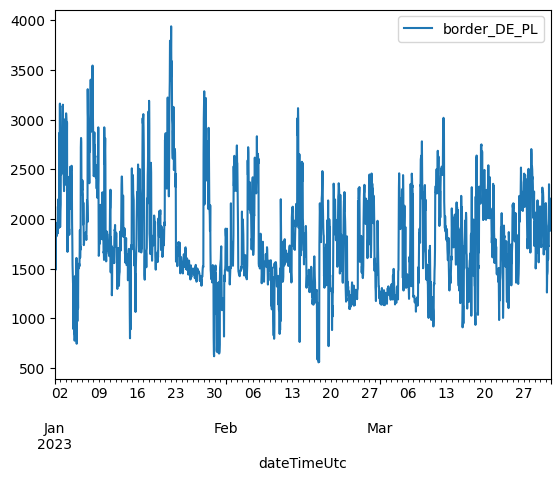

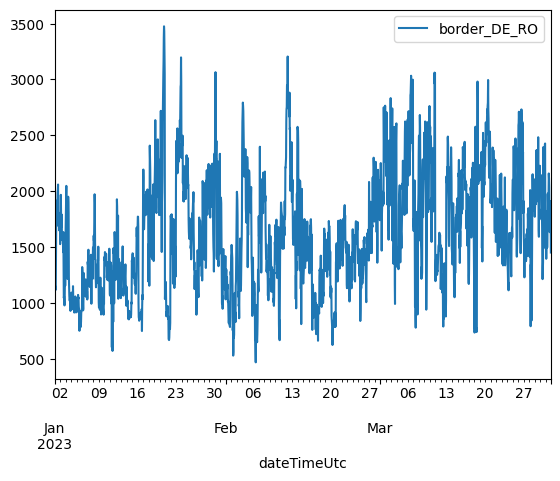

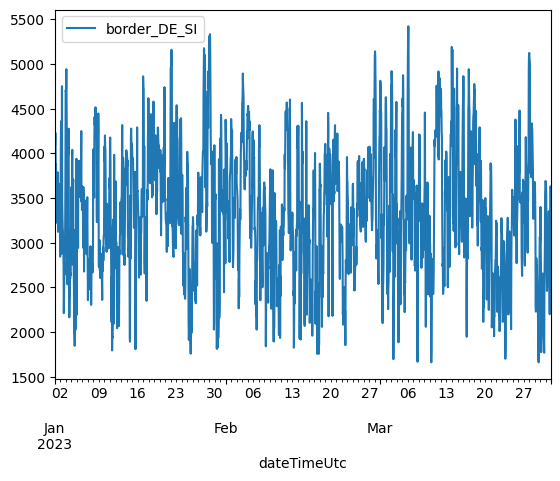

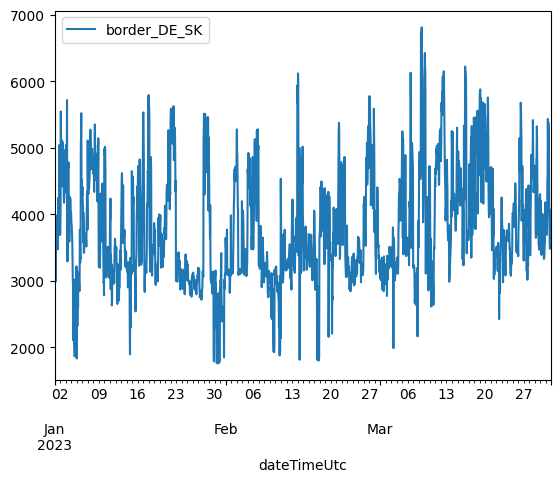

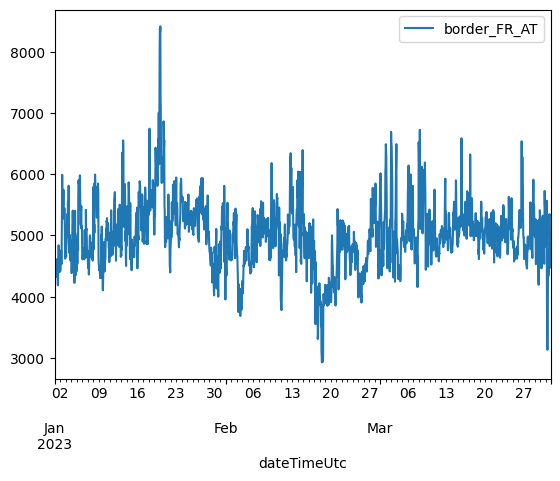

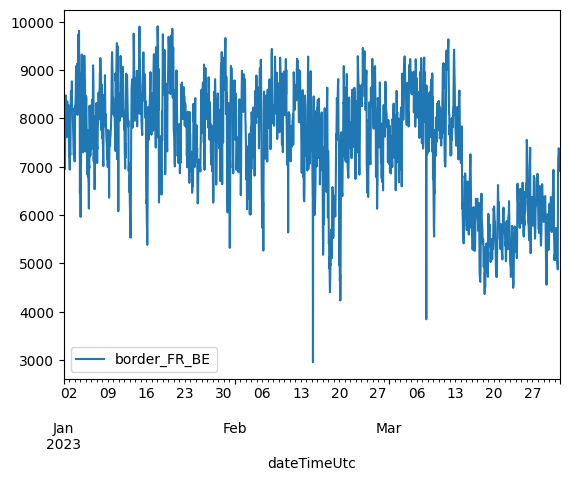

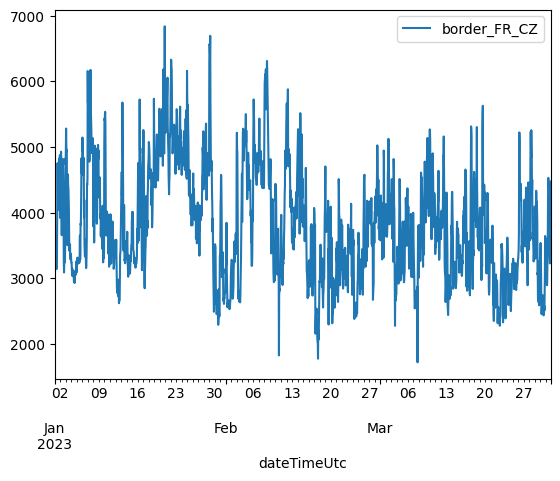

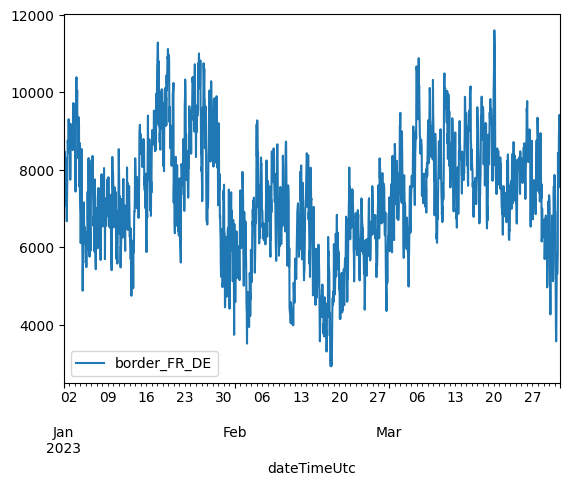

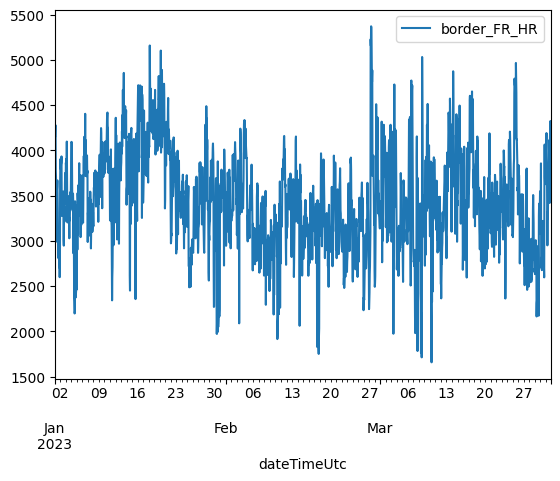

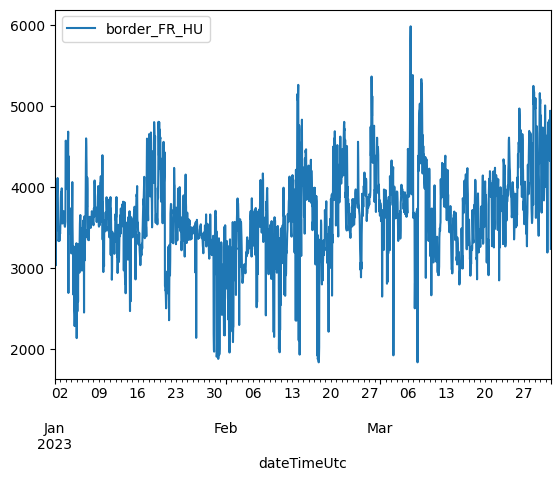

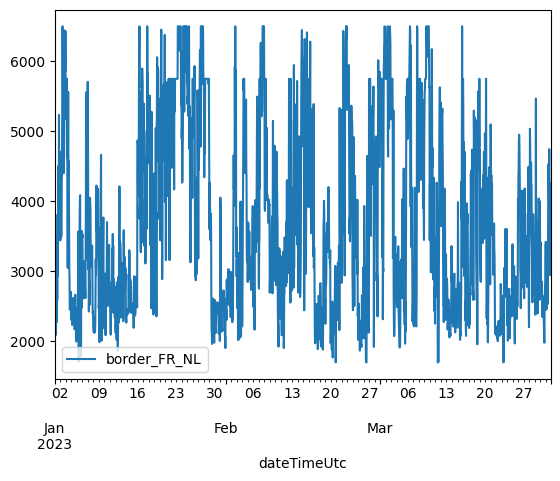

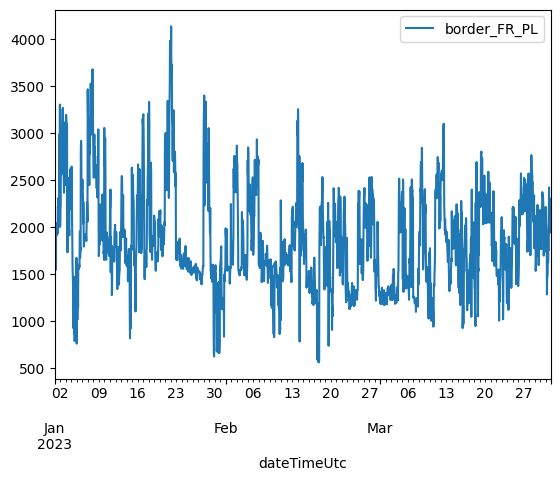

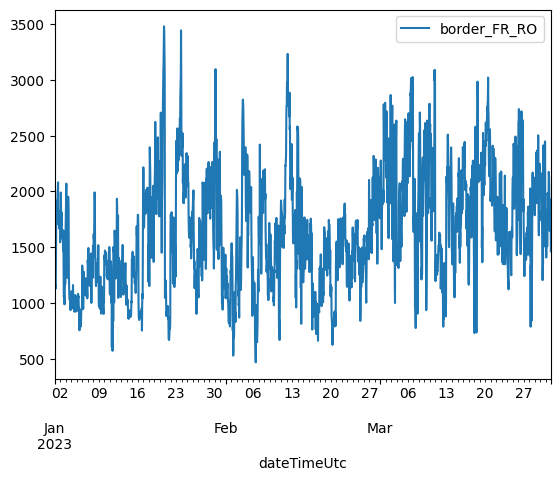

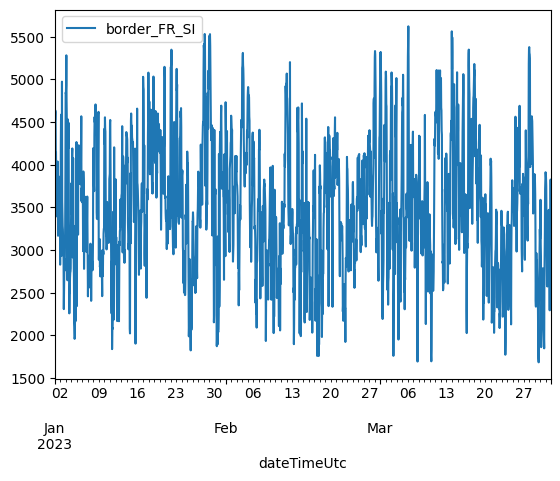

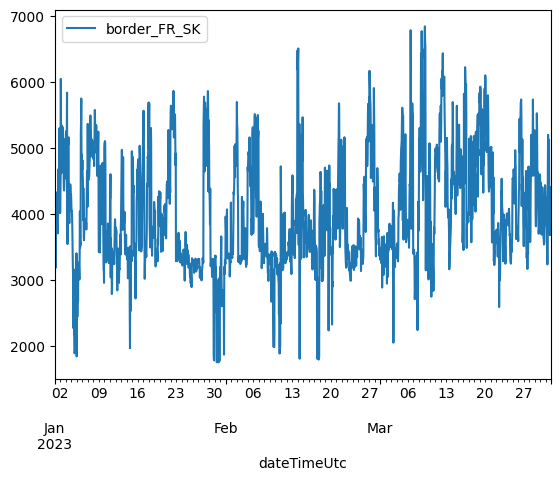

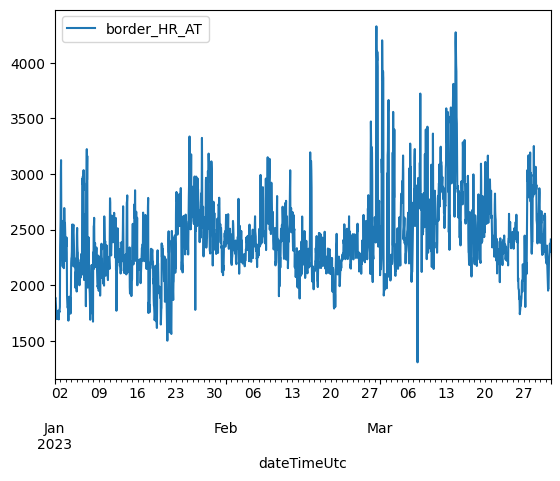

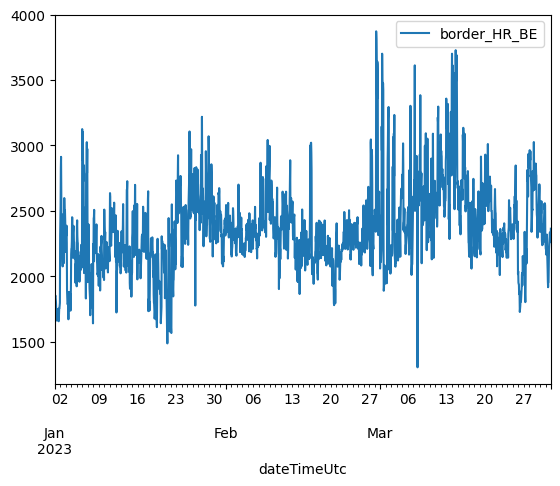

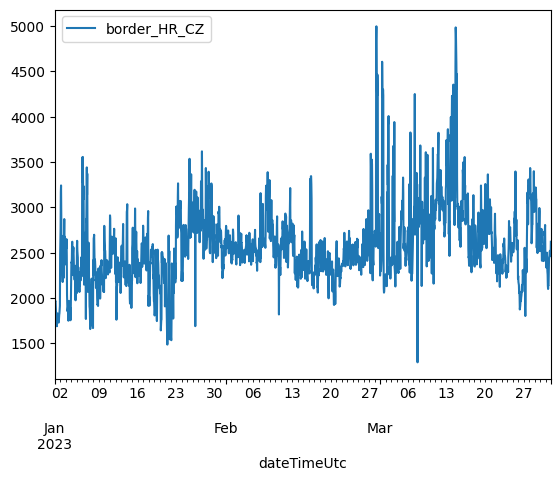

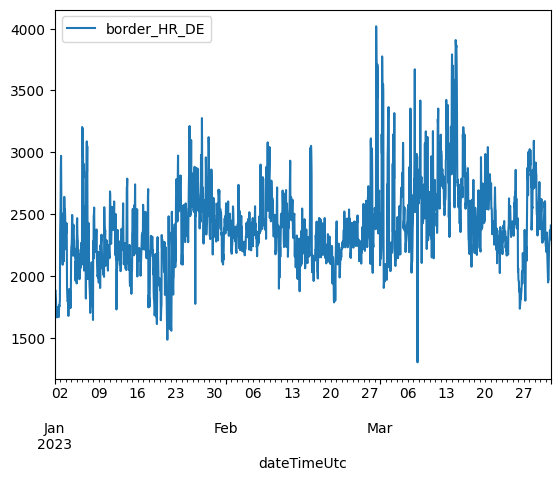

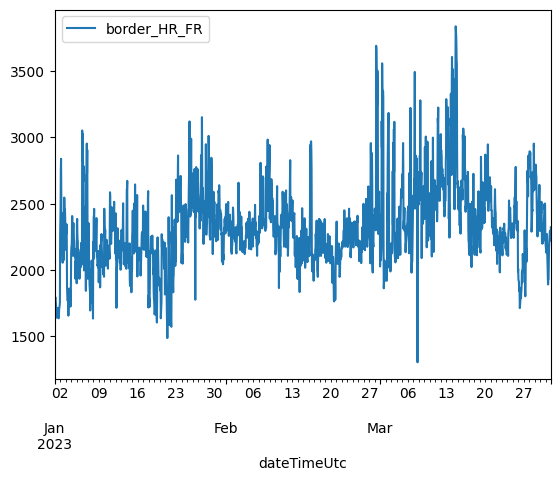

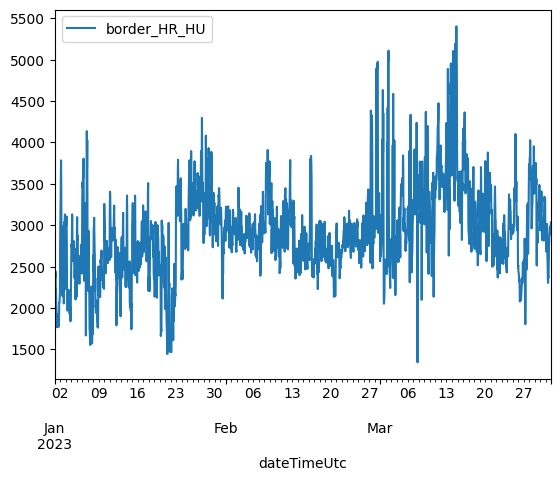

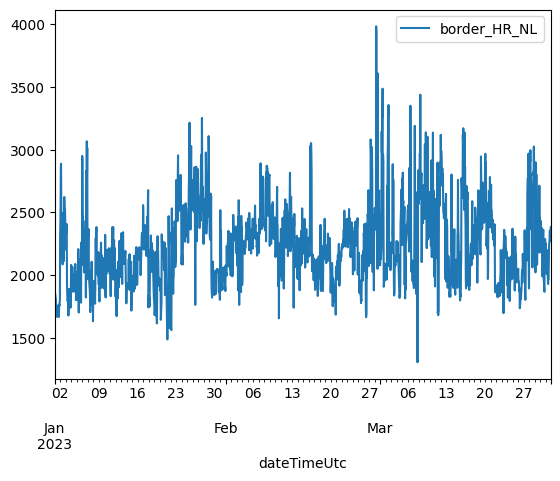

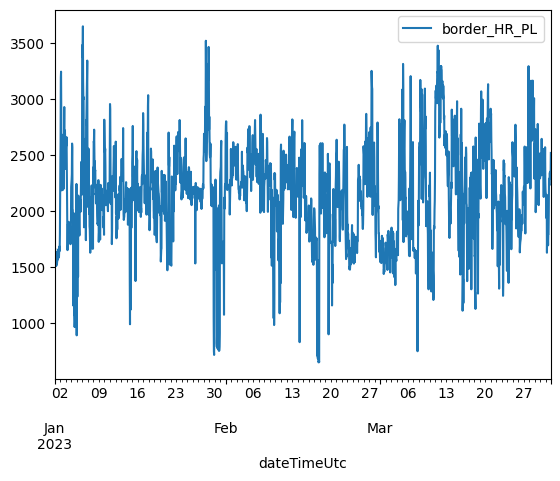

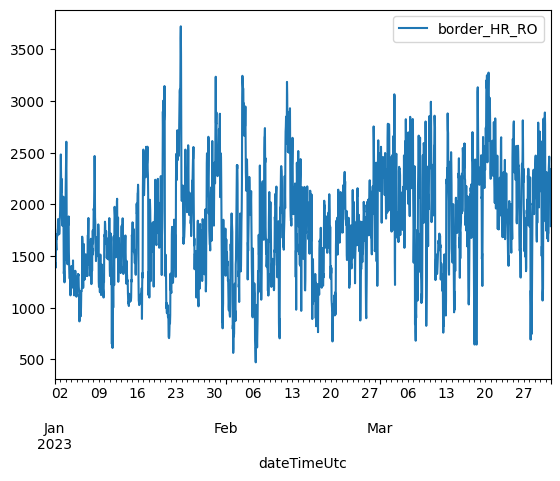

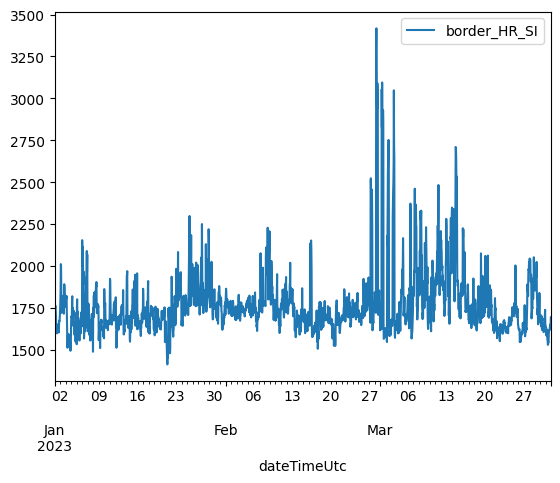

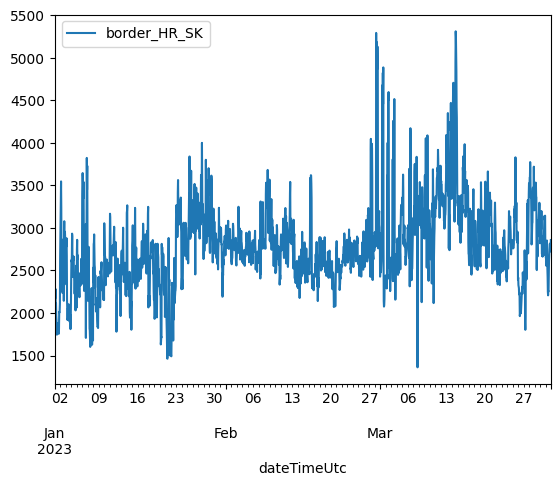

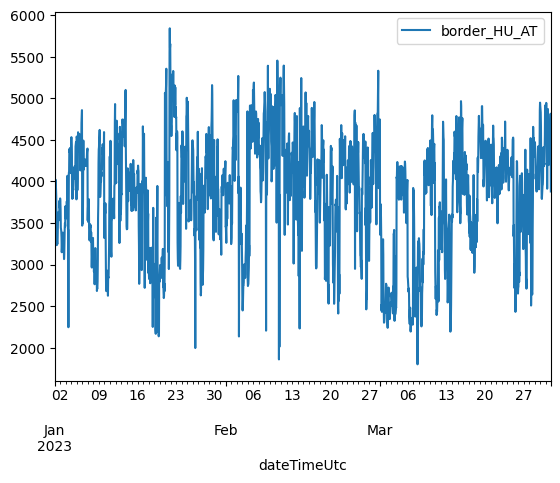

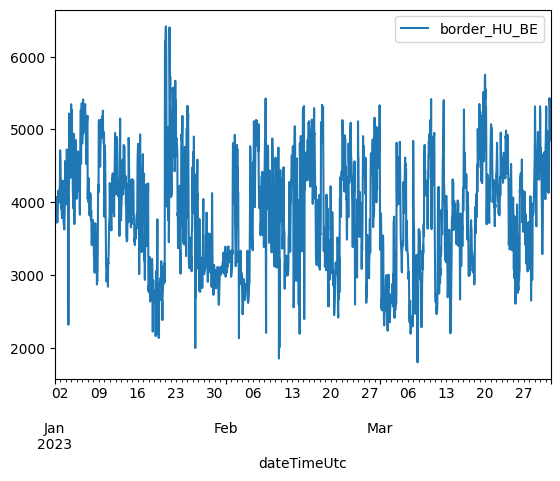

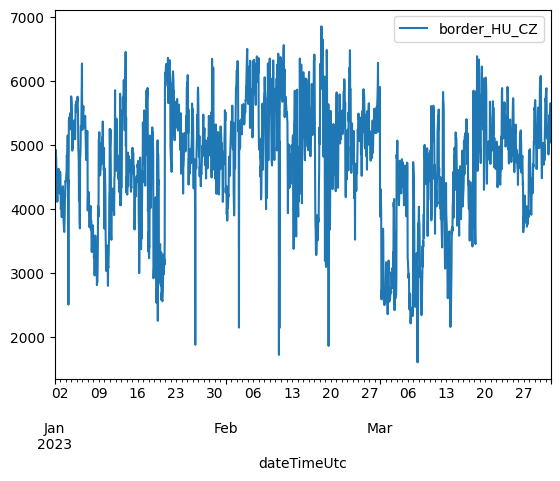

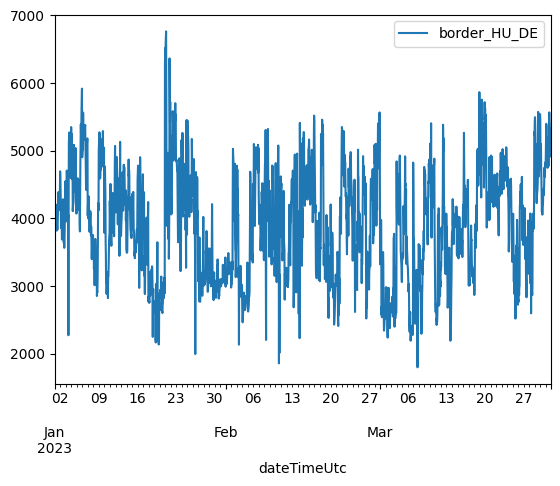

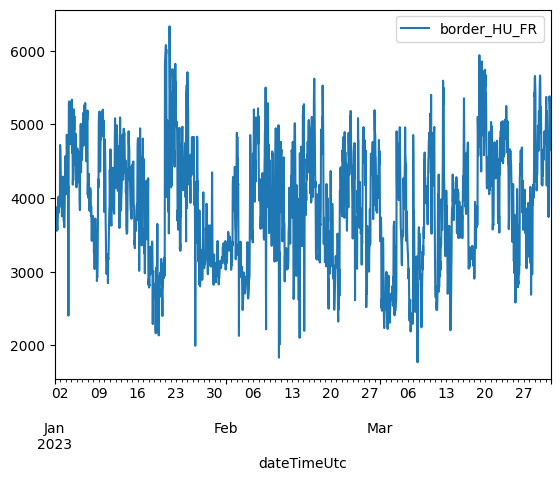

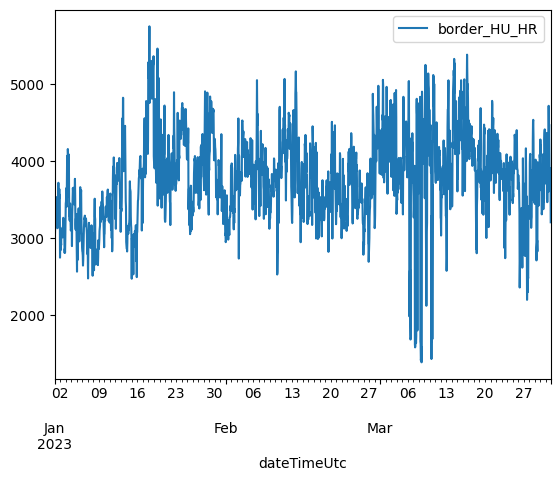

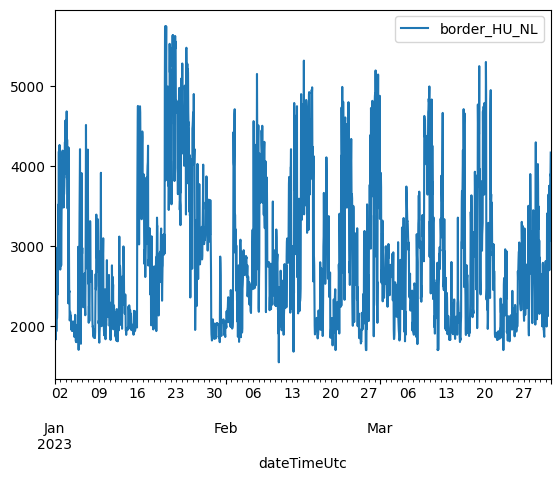

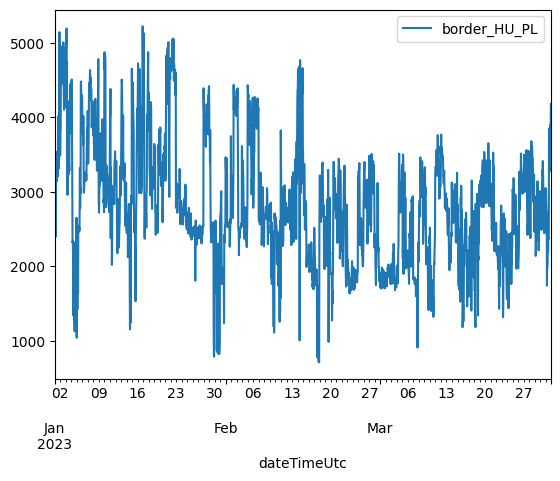

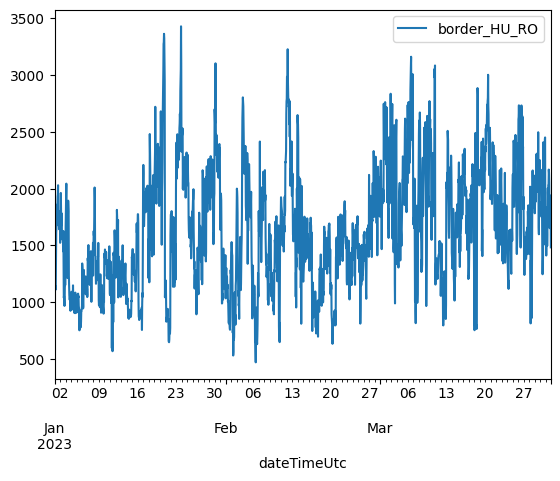

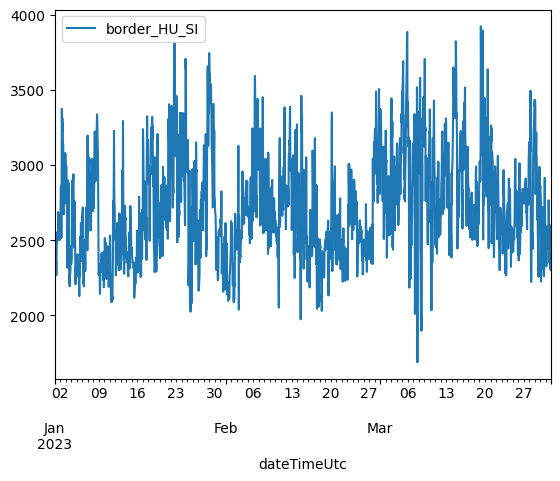

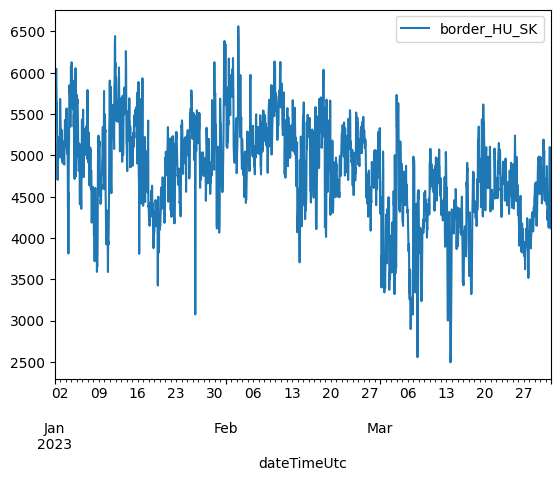

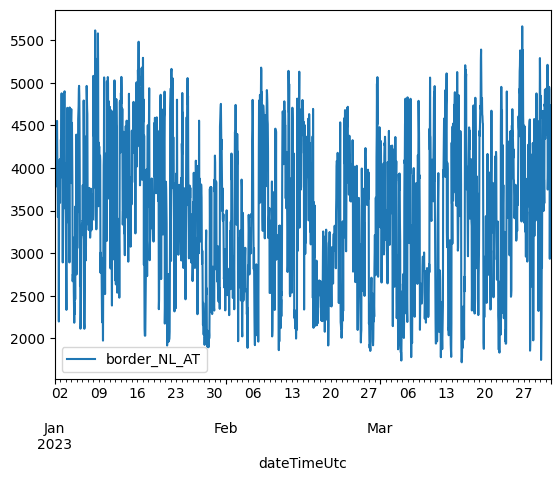

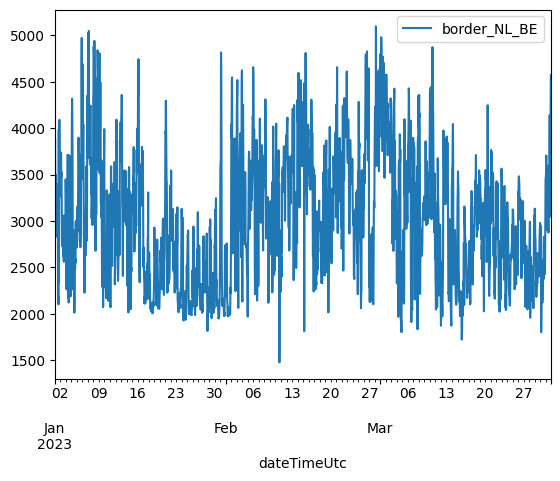

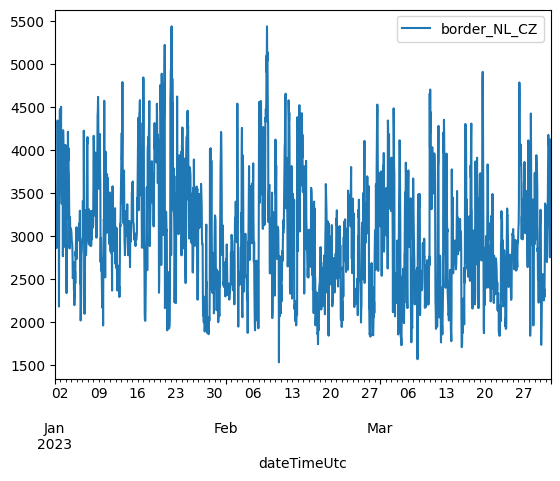

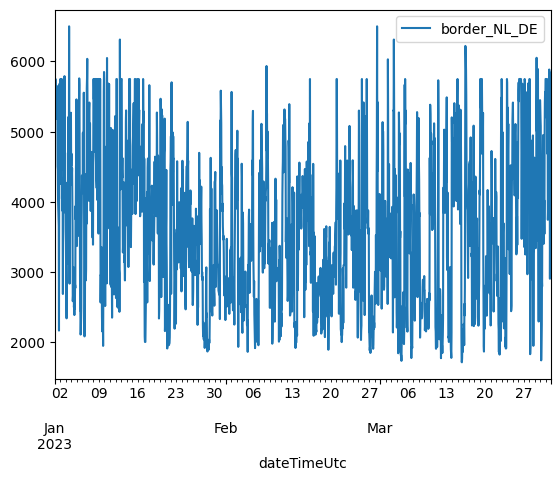

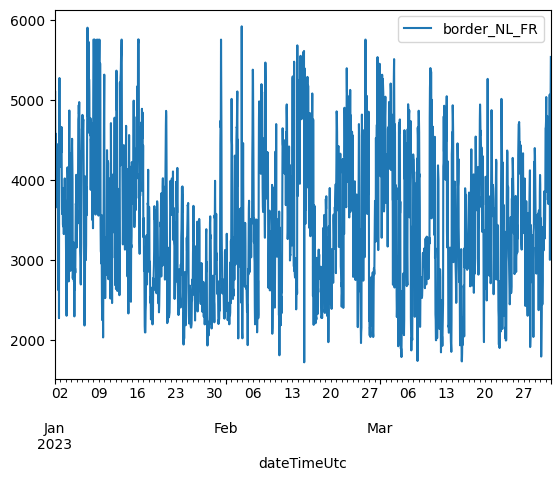

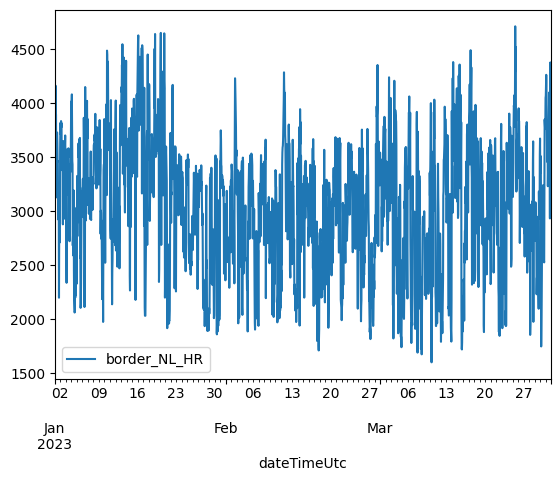

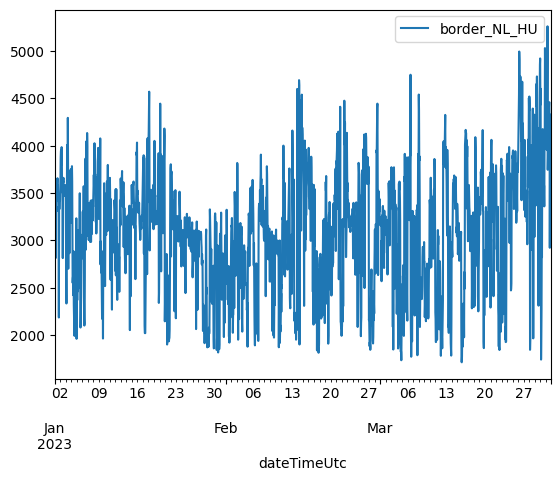

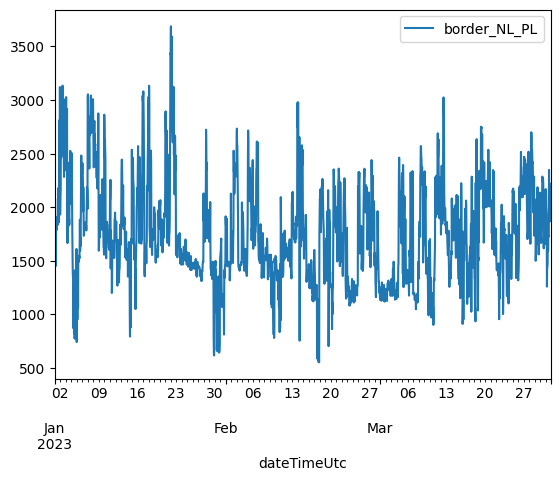

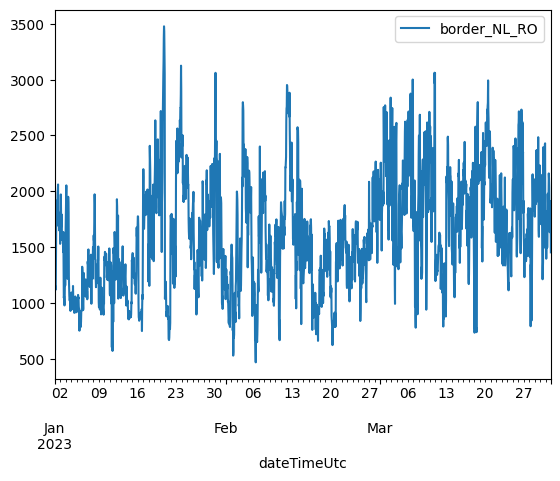

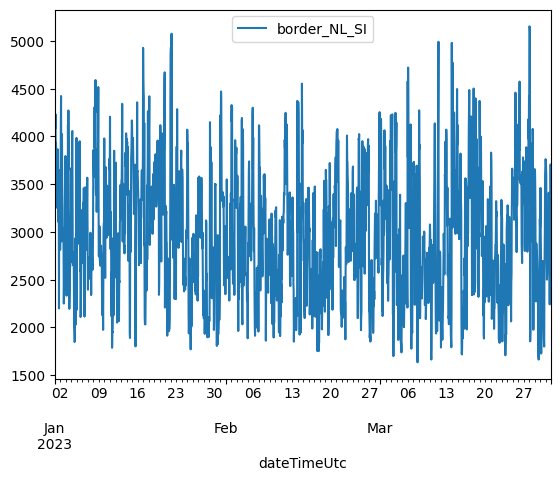

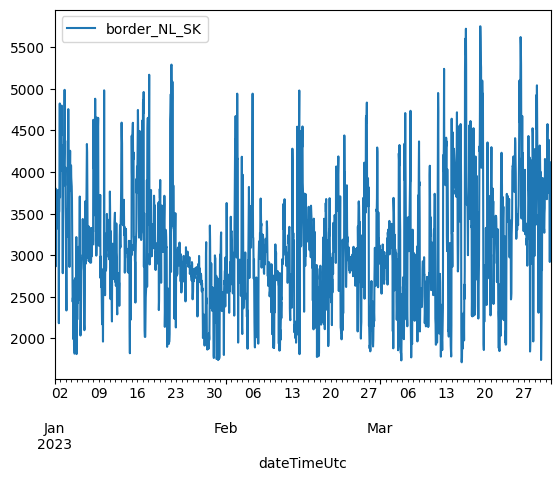

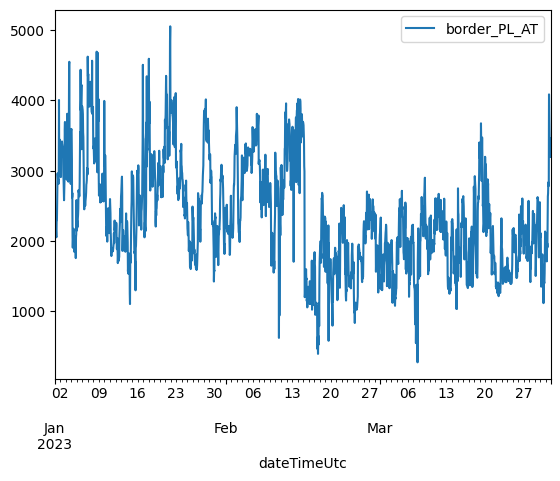

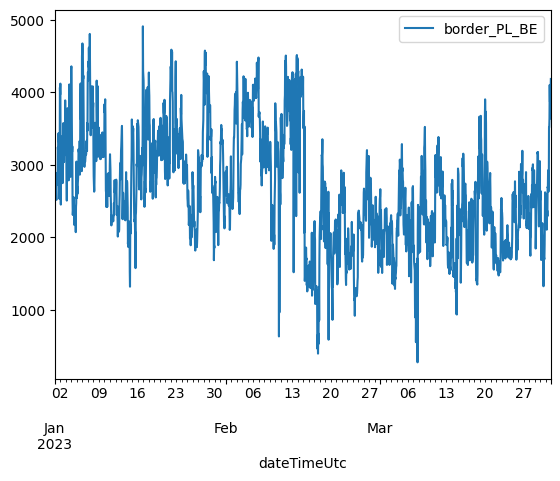

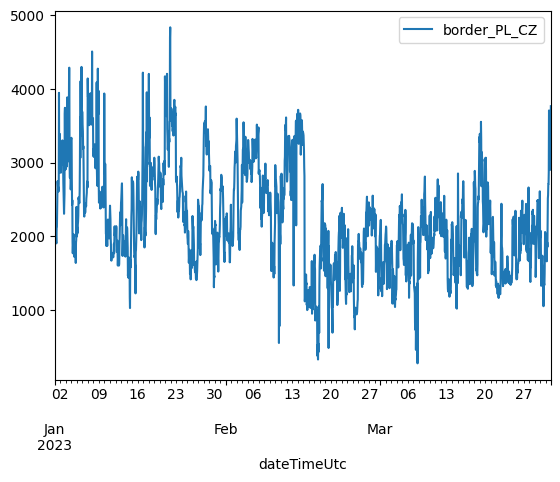

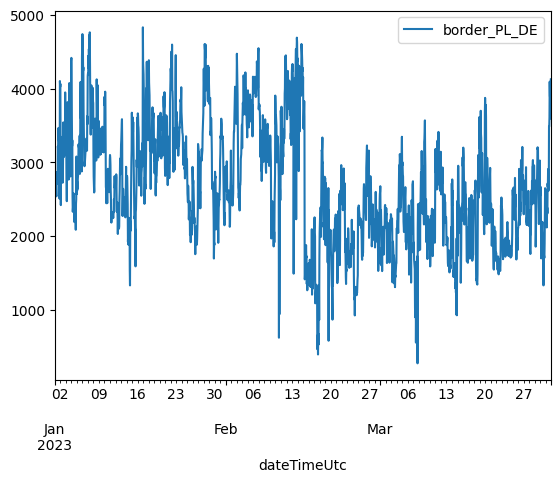

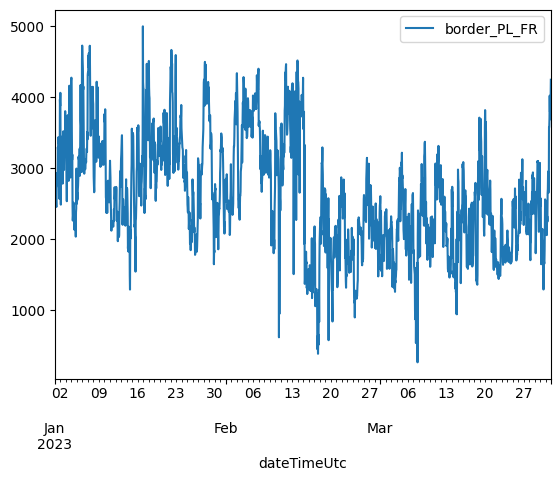

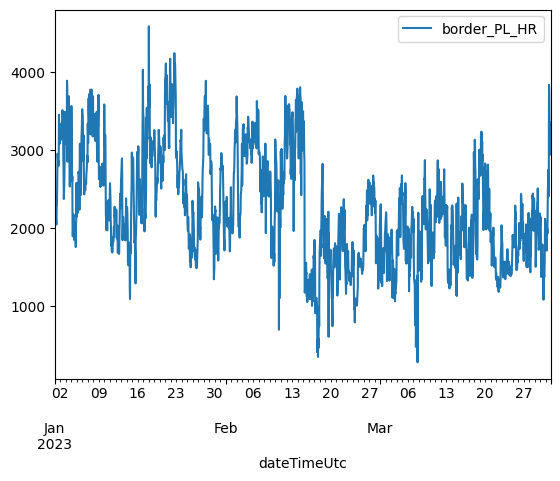

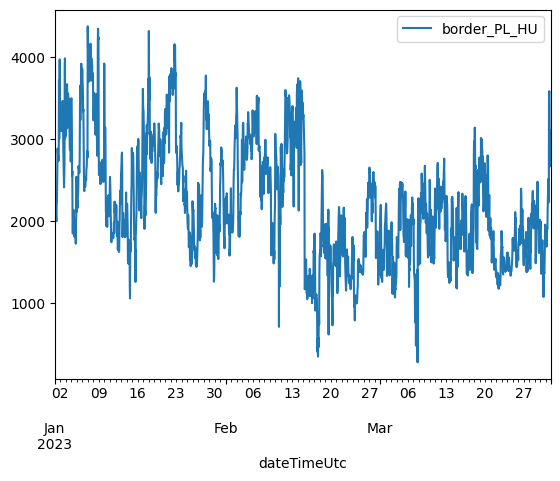

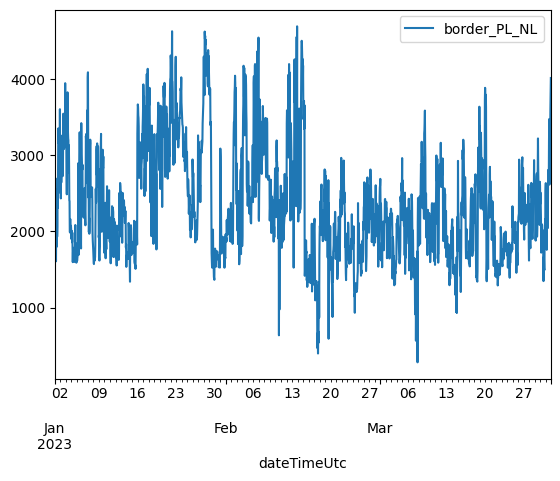

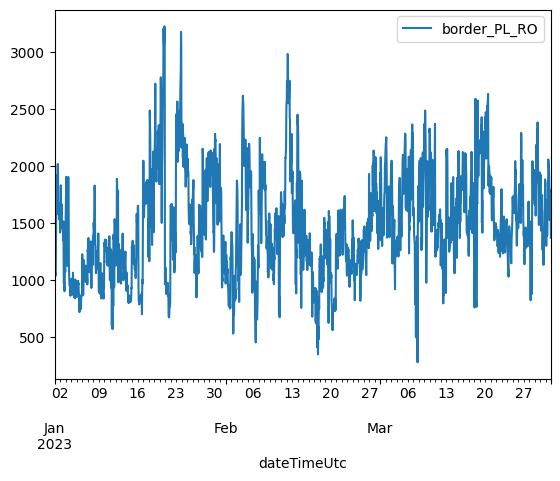

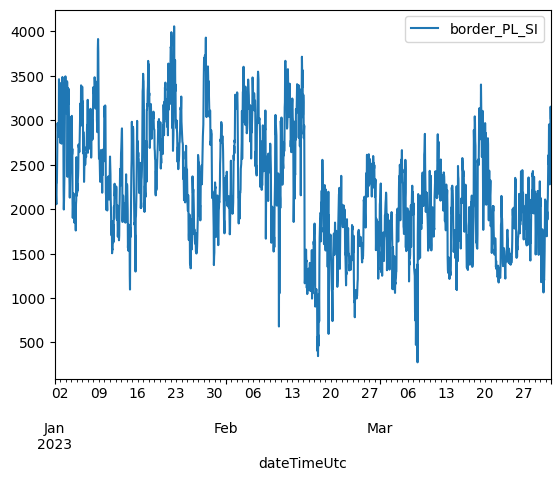

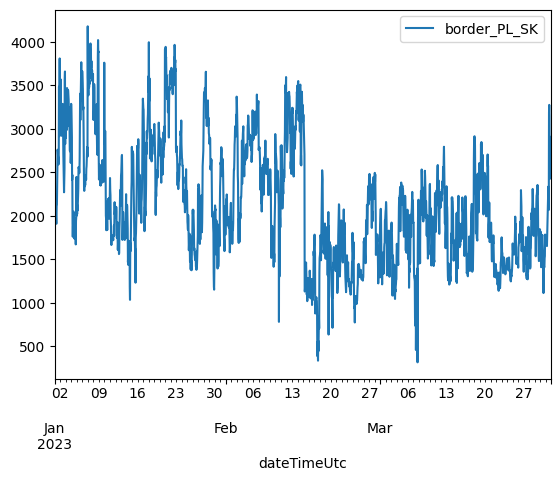

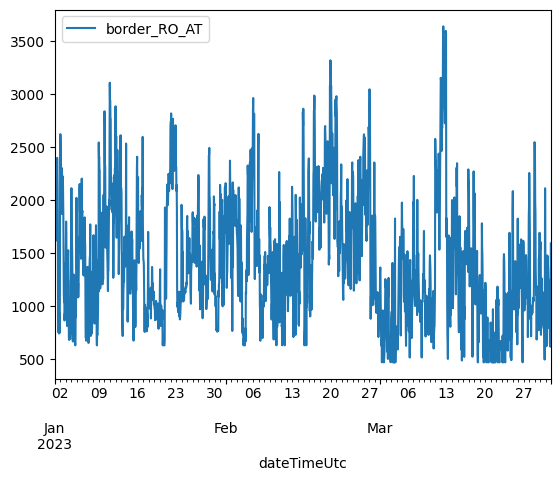

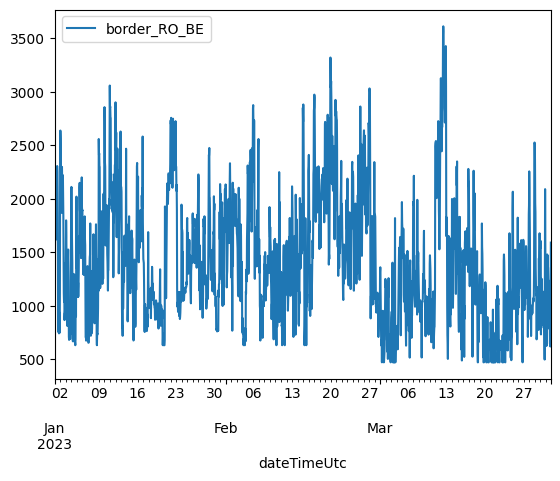

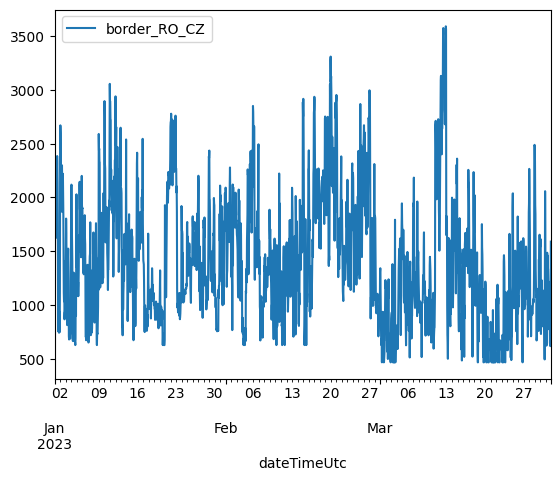

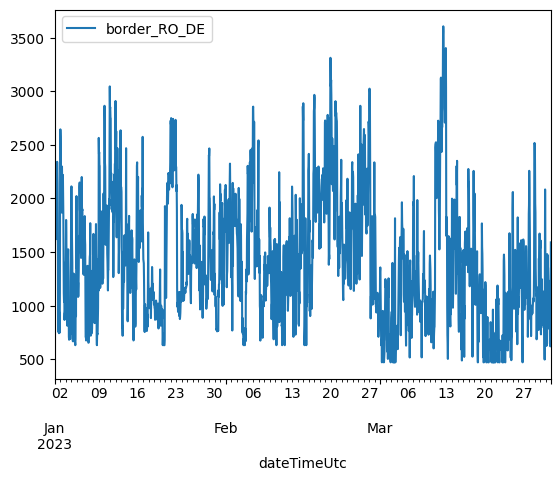

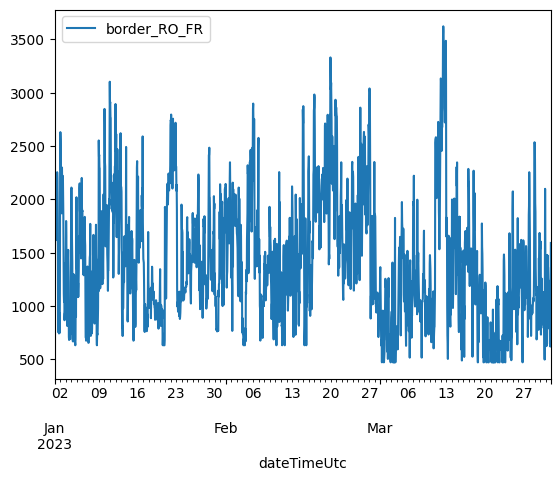

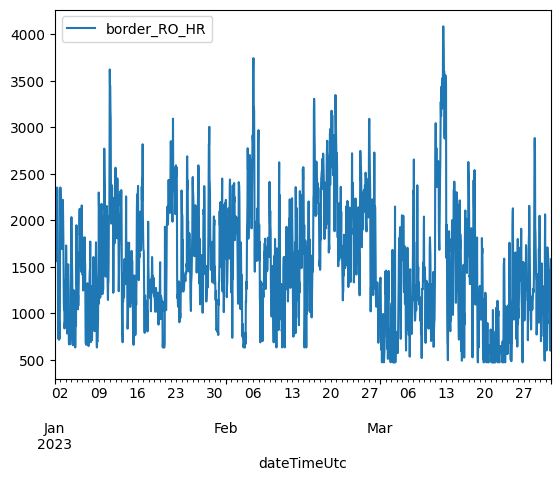

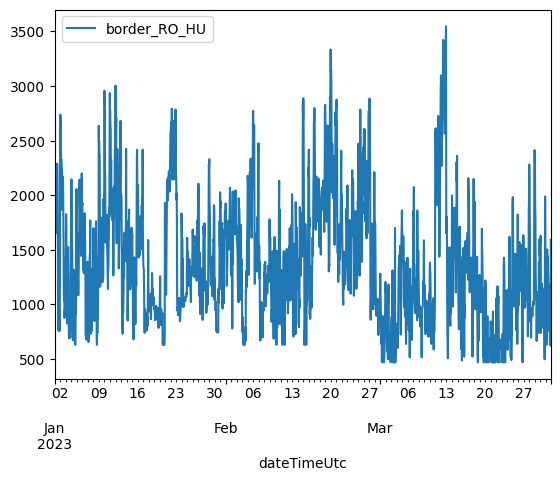

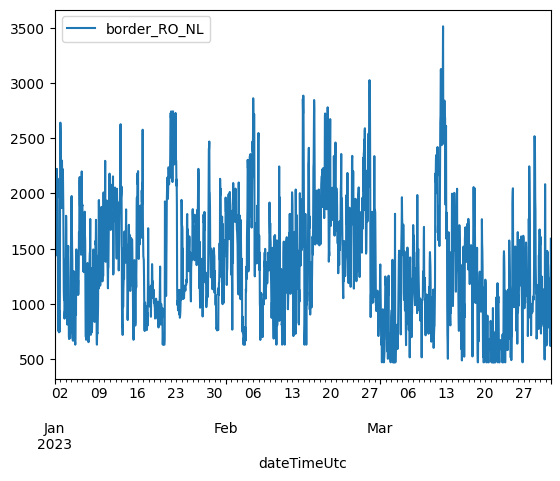

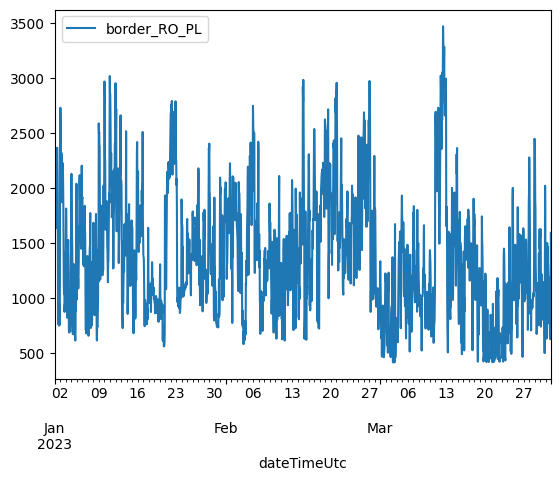

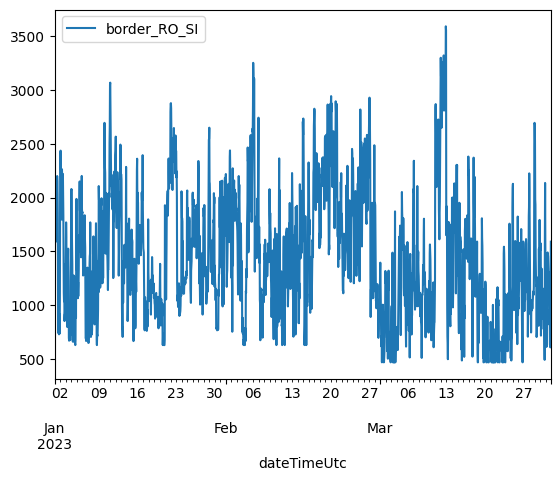

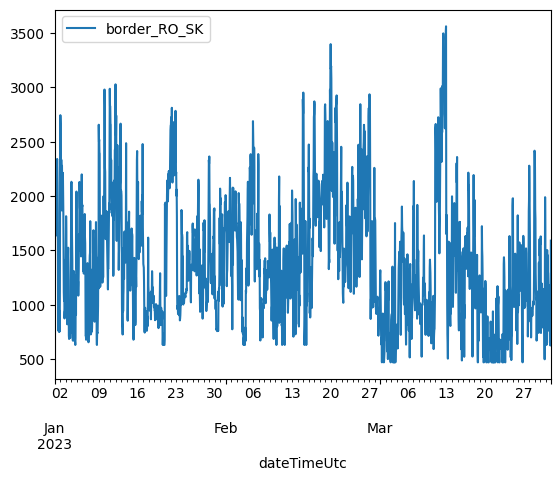

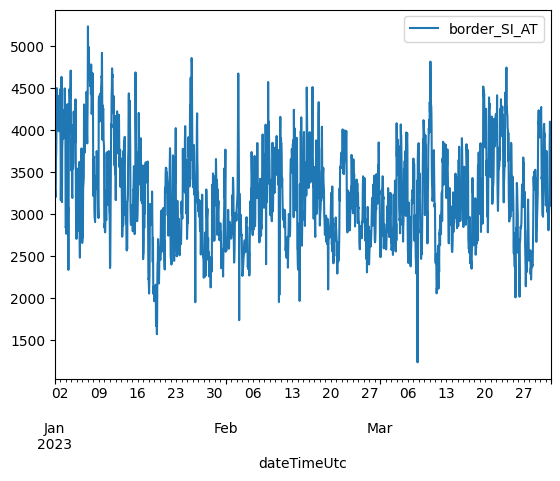

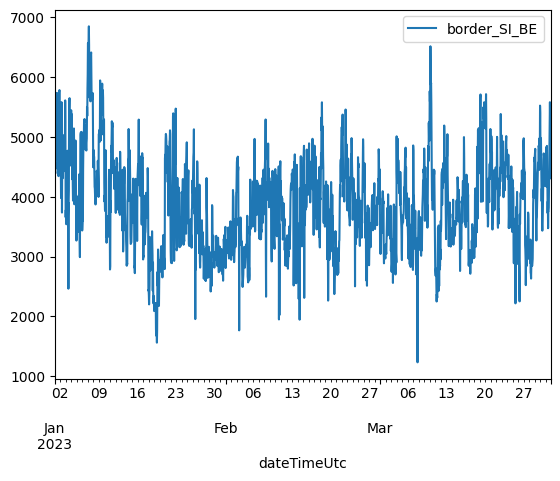

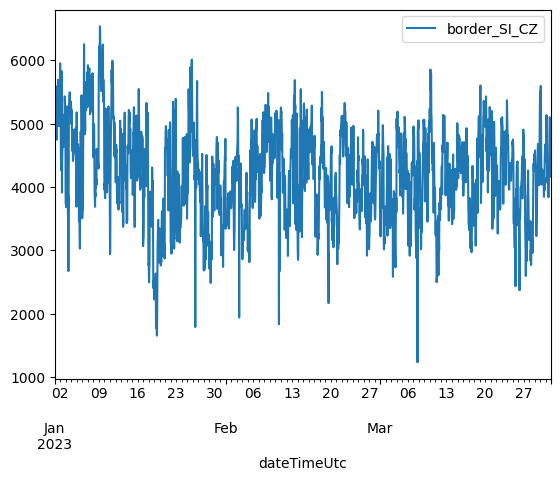

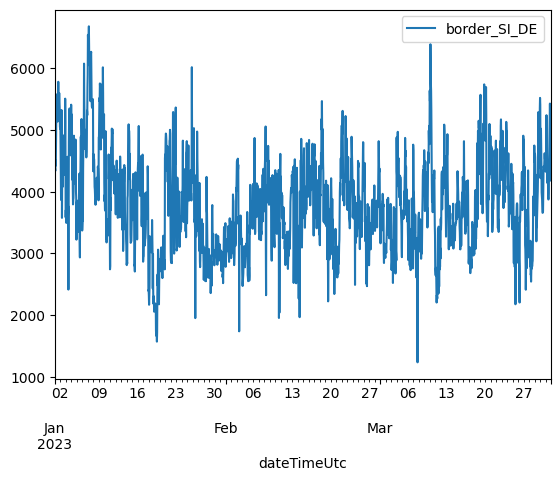

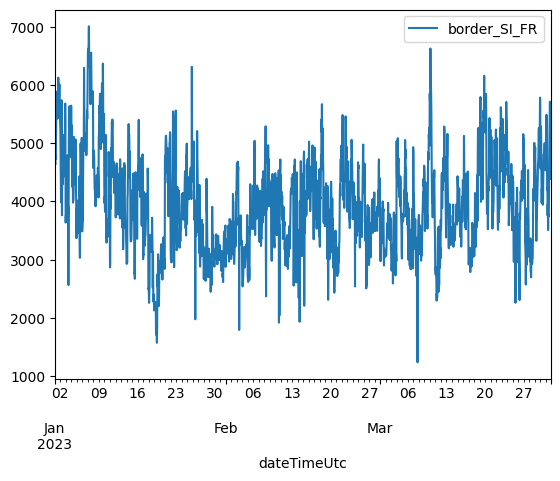

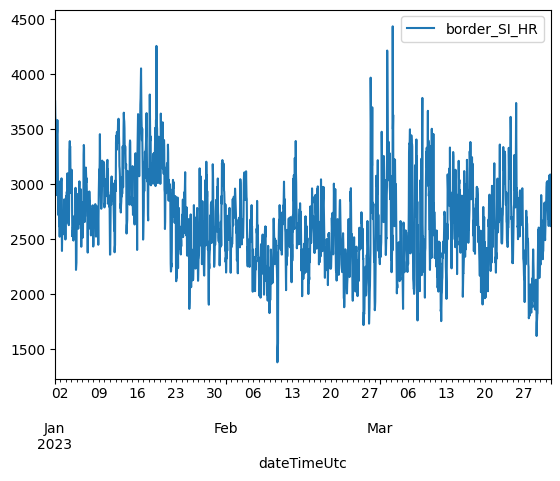

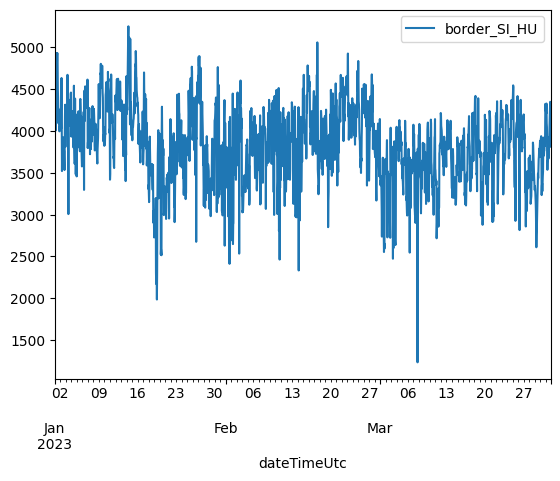

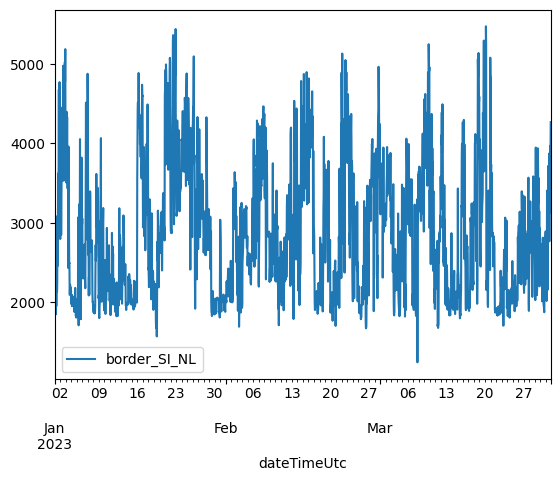

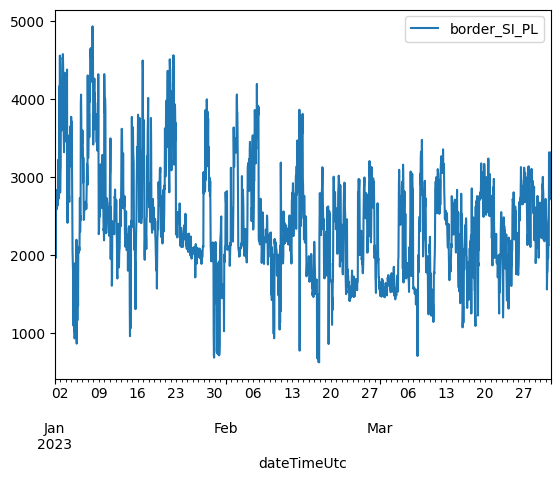

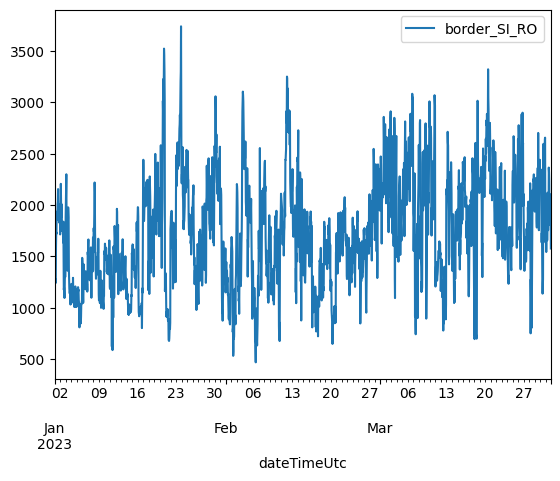

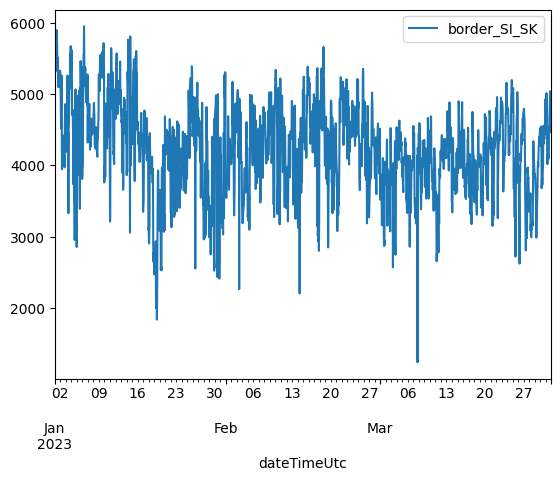

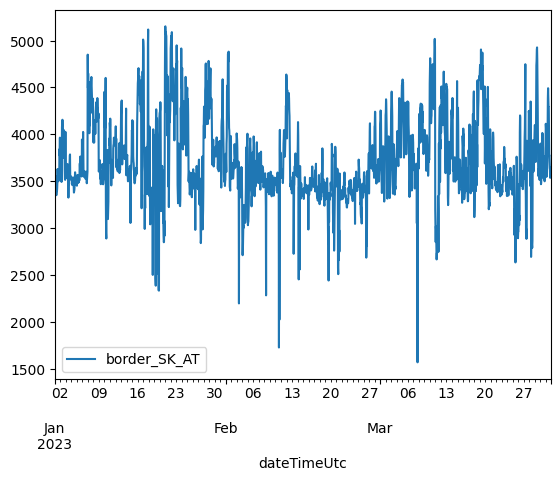

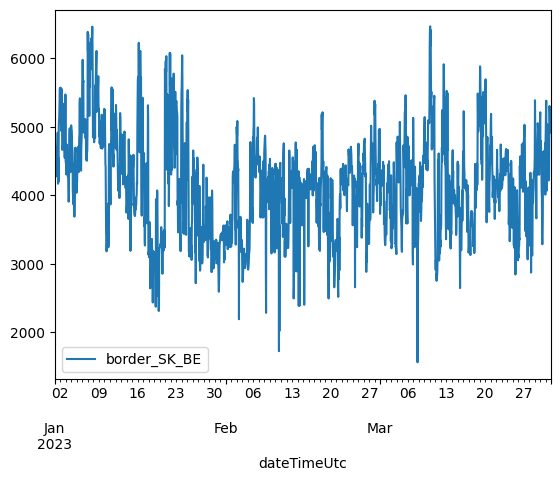

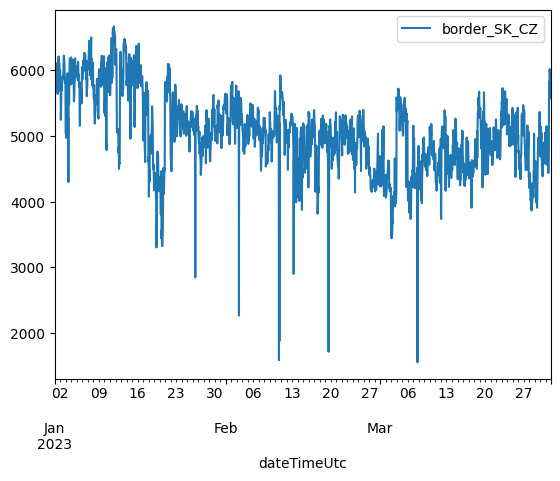

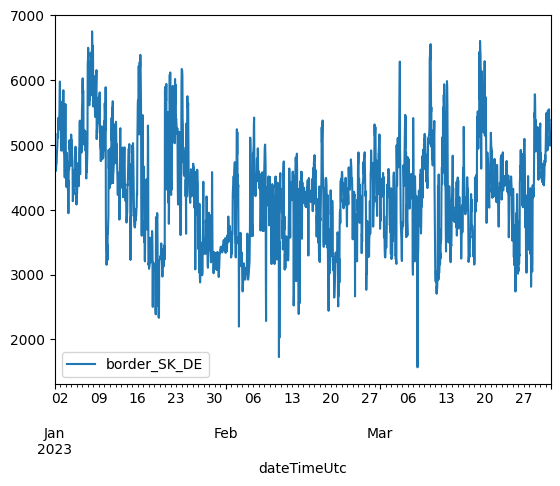

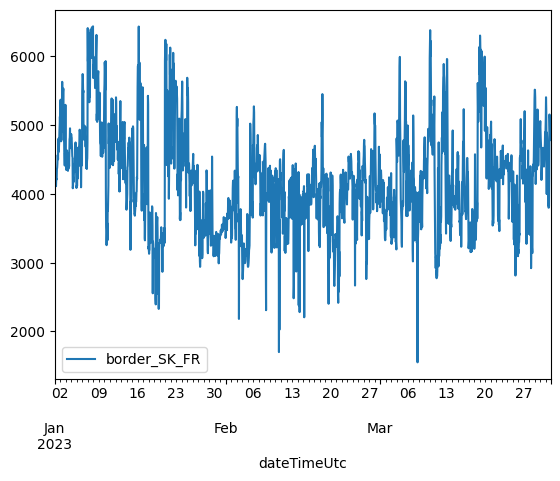

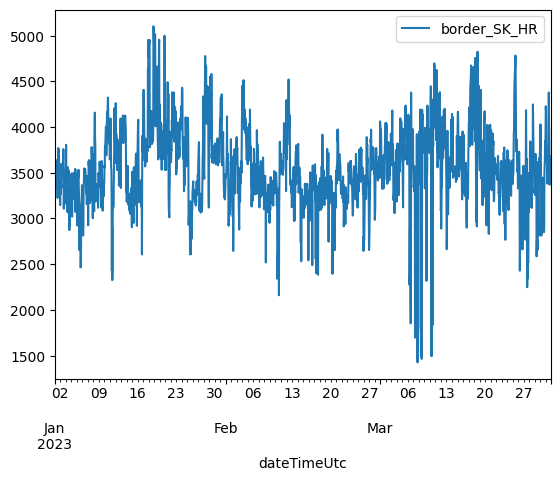

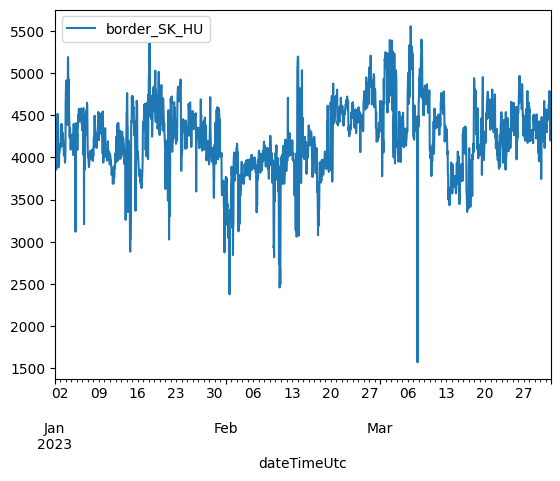

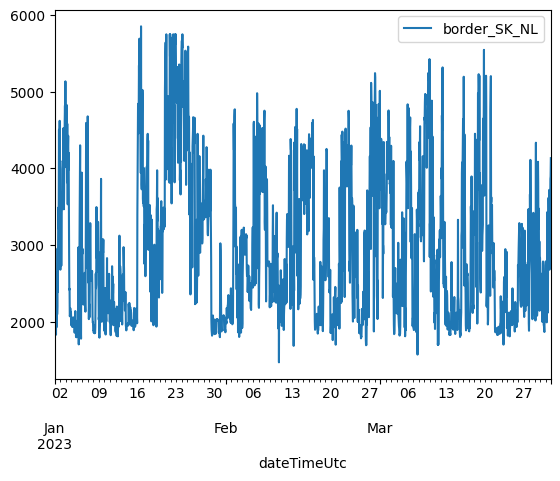

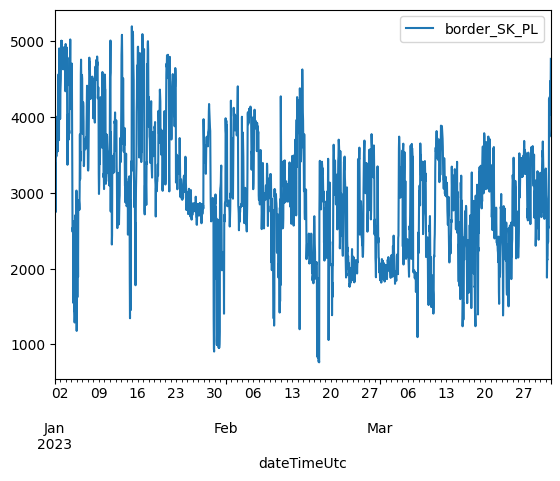

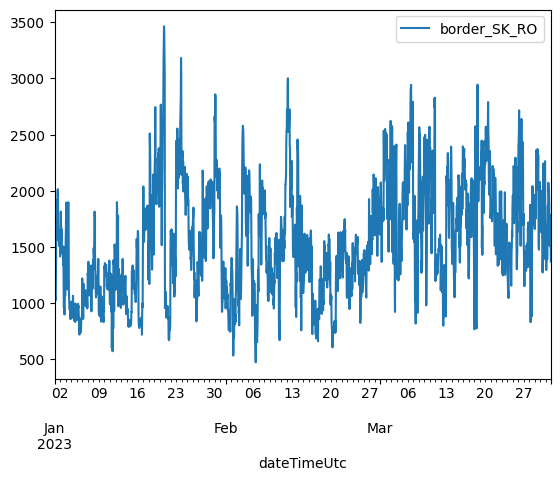

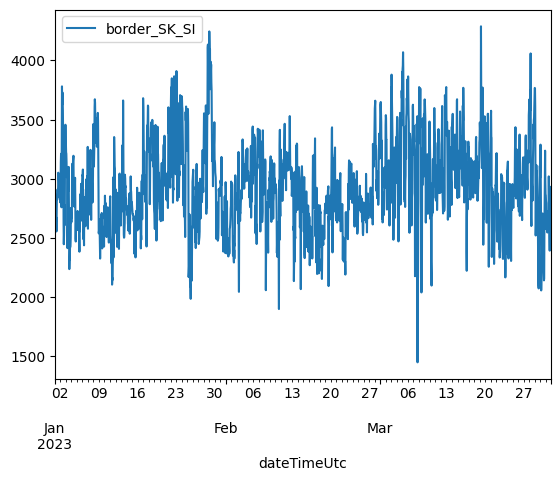

In [64]:
for border in df_maxbex.columns.unique():
    if border != 'id':
        df_maxbex[border].plot(legend=True)
        plt.show()